# [1] Gemstone Price Prediction

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### [i] Problem Statement

- This project uses Statustical Models of Machine Learning to understand the relationship 
in the data and how the price is dependent on the features.

### [ii] Data Collection

- Data Source - https://www.kaggle.com/competitions/playground-series-s3e8
- The dataset has 2 files.
  * train.csv
  * test.csv
- The dataset consist of 10 independent variables.


## [1.1] Necessary Packages Imports

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
%matplotlib inline

ModuleNotFoundError: No module named 'sklearn'

## [1.2] Import Train and Test Data

In [2]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

### [1.2.1] Top 5 Records

In [3]:
train_df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
test_df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,193573,0.35,Ideal,D,VS2,62.3,56.0,4.51,4.54,2.82
1,193574,0.77,Very Good,F,SI2,62.8,56.0,5.83,5.87,3.68
2,193575,0.71,Ideal,I,VS2,61.9,53.0,5.77,5.74,3.55
3,193576,0.33,Ideal,G,VVS2,61.6,55.0,4.44,4.42,2.73
4,193577,1.20,Very Good,I,VS2,62.7,56.0,6.75,6.79,4.24


In [5]:
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

[1.2.2] Shape / Dimensionality of Train and Test Data

In [6]:
train_df.shape

(193573, 10)

In [7]:
test_df.shape

(129050, 9)

## [1.3] Data Check to perform

- Check Missing Values
- Check Duplicates
- Check datatypes
- Check number of unique values for each column
- Check statistics of the data
- Check various categories present in the different categorical column

### [1.3.1] Check datatype and metadata

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 14.8+ MB


### [1.3.2] Checking the number of unique values of each column

In [9]:
train_df.nunique(axis=0)

carat       248
cut           5
color         7
clarity       8
depth       153
table       108
x           522
y           521
z           349
price      8738
dtype: int64

### [1.3.3] Check for Missing Values

In [10]:
train_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

There are no missing values in the dataset

### [1.3.3] Check for Duplicates

In [11]:
train_df.duplicated().sum()

0

There are no duplicates in the data set

### [1.3.4] Check statistics of Dataset

In [12]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


* Coun of rows in (train_df.shape) = (train_df.describe) => No missing values
* max > mean & median for z which shows presence of outliers
* std are close between 0-1
* means and medians are almost similar

In [13]:
train_df.describe(include='object').T

,count,unique,top,freq
cut,193573,5,Ideal,92454
color,193573,7,G,44391
clarity,193573,8,SI1,53272


* ideal type is occured maore.

### [1.3.5] Explore Values for Categorical Columns

In [14]:
categorical_features = list(train_df.select_dtypes(include='object').columns)
numerical_features = list(train_df.select_dtypes(exclude='object'))
print(f'Numerical features in the data are: {numerical_features}')
print(f'Categorical features in the data are: {categorical_features}')

for feature in categorical_features:
    unique_clesses = train_df[feature].unique()
    print(f'Categories in "{feature}" feature:  {unique_clesses}')

Numerical features in the data are: ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
Categorical features in the data are: ['cut', 'color', 'clarity']
Categories in "cut" feature:  ['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']
Categories in "color" feature:  ['F' 'J' 'G' 'E' 'D' 'H' 'I']
Categories in "clarity" feature:  ['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1']


## [1.4] Dataset Information

### Introduction About the Data :

**The dataset**

* `id` : unique identifier of each diamond
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension

Target variable:
* `price`: Price of the given Diamond.

# [2] Exploratory Data Analysis

## [2.1] Univariate Analysis for Numerical features

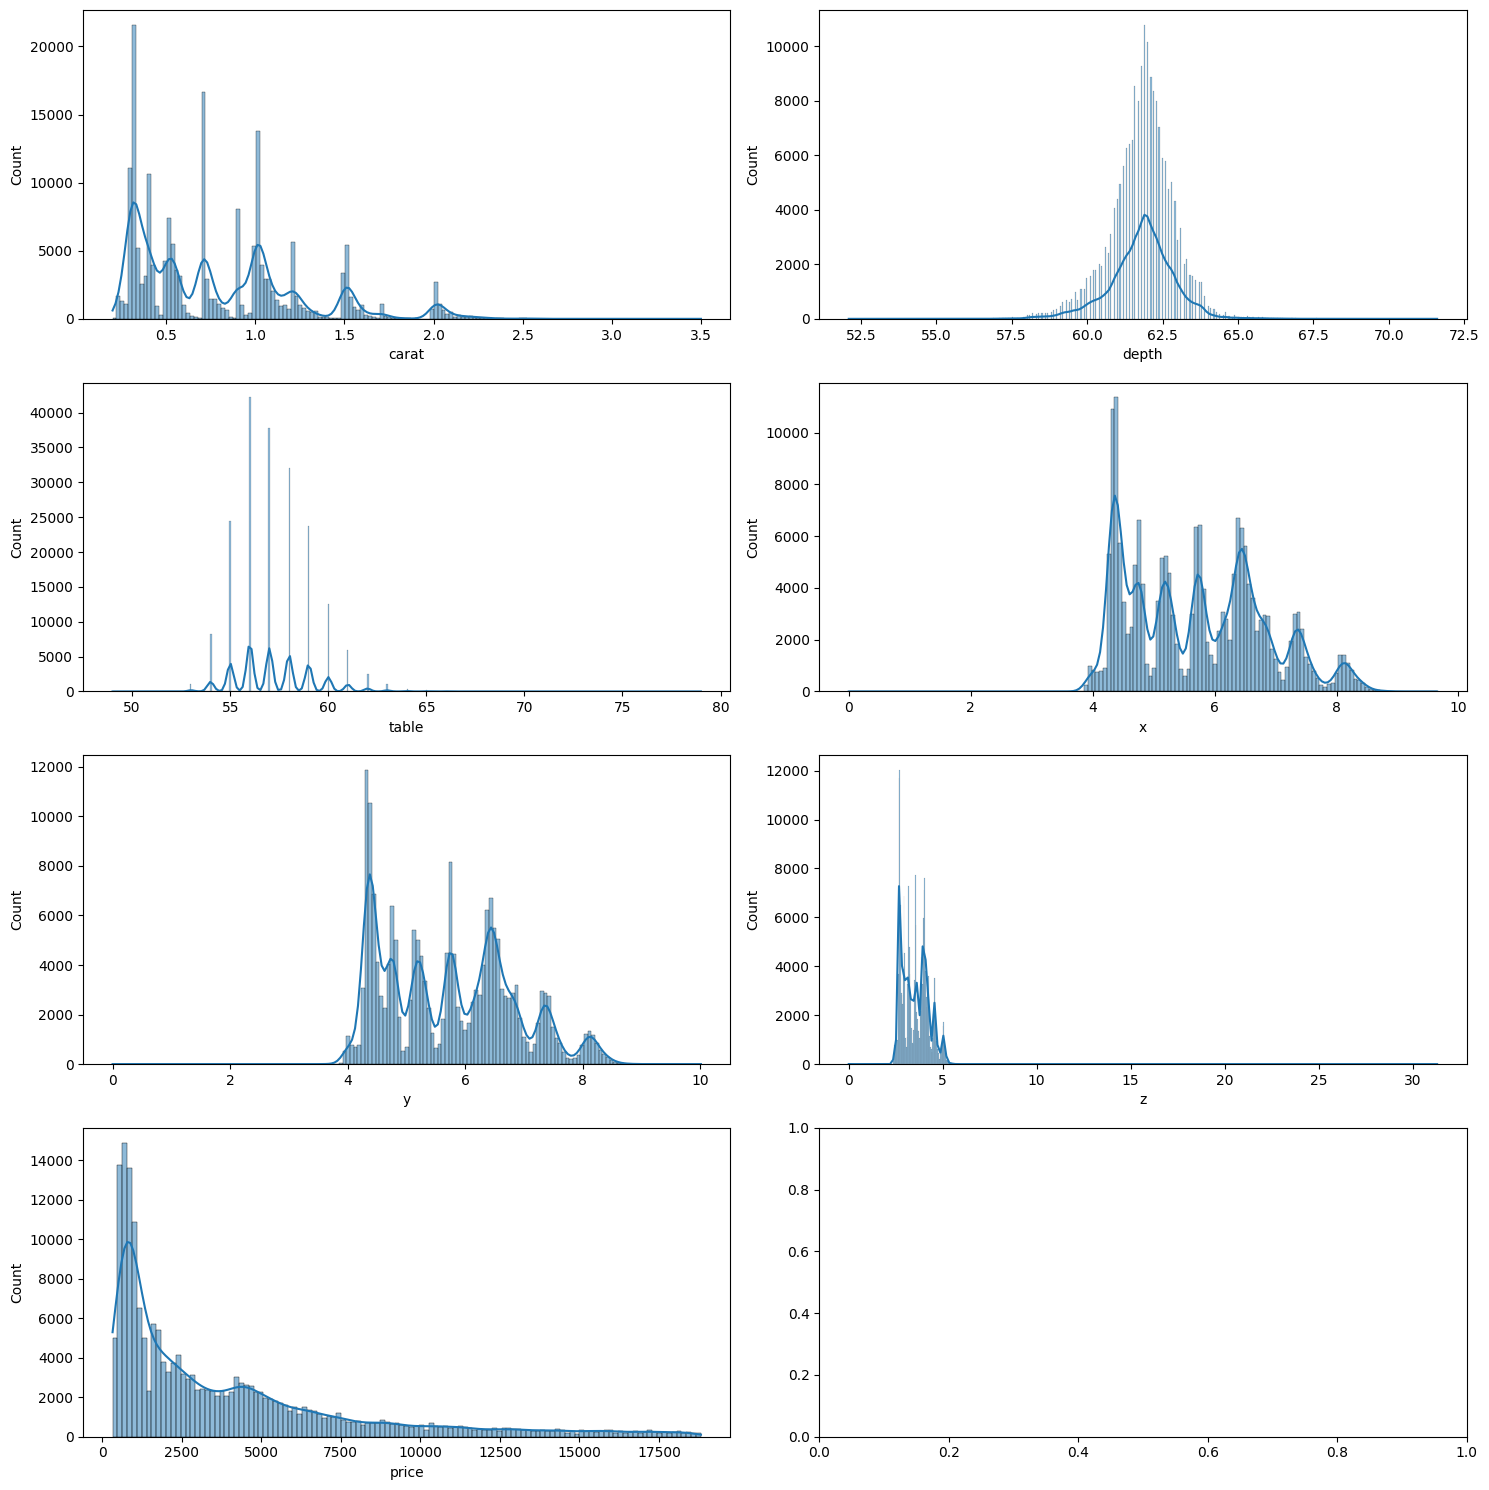

In [16]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

# Assuming numerical_features is a list of numerical feature names
for i, (ax, feature) in enumerate(zip(axs.flatten(), numerical_features)):
    sns.histplot(data=train_df, x=feature, kde=True, ax=ax)

plt.tight_layout()
plt.show()


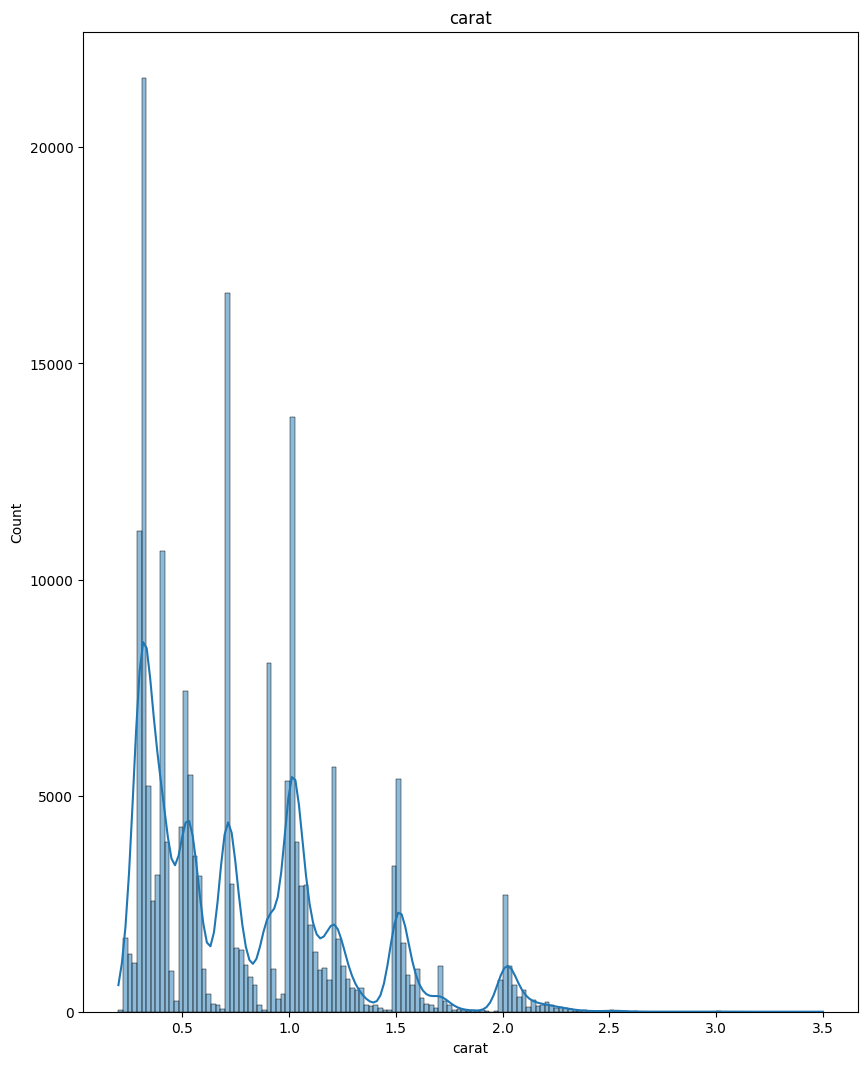

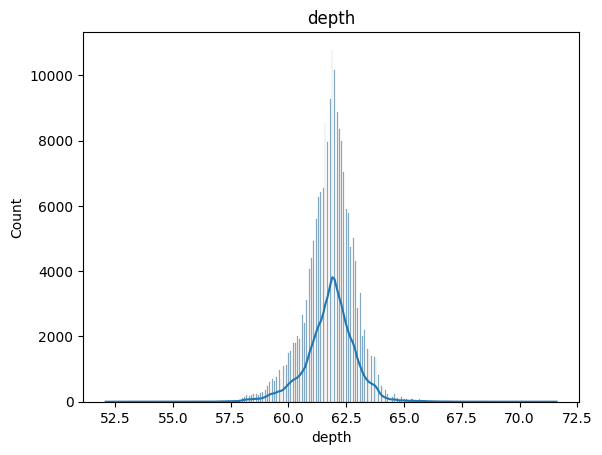

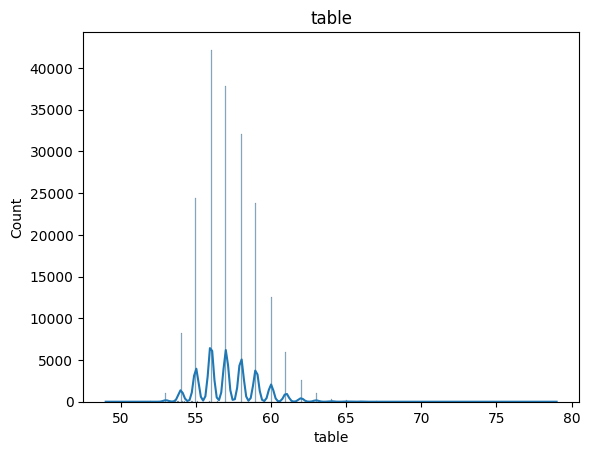

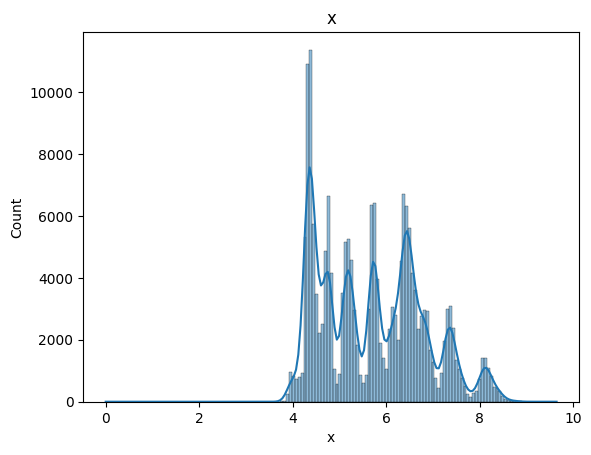

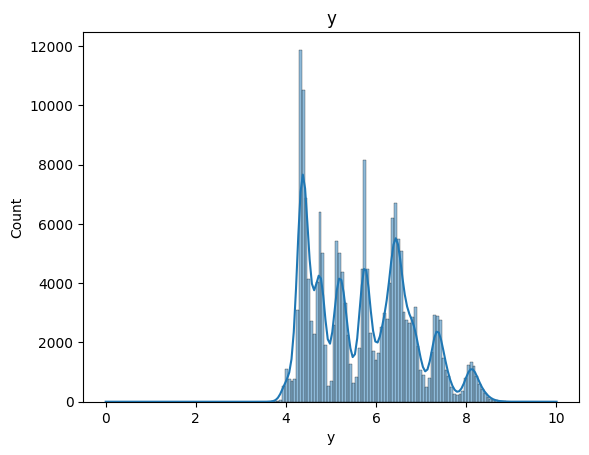

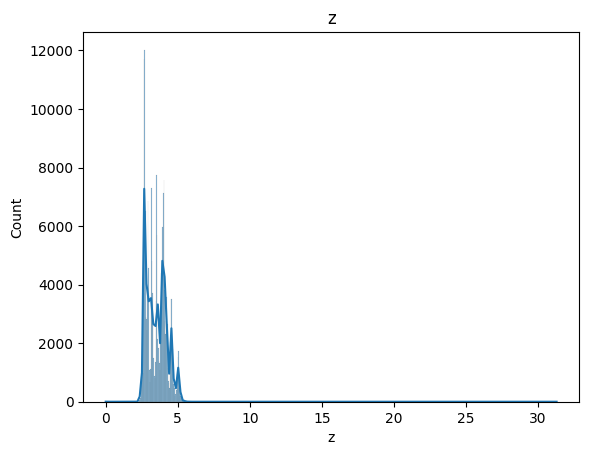

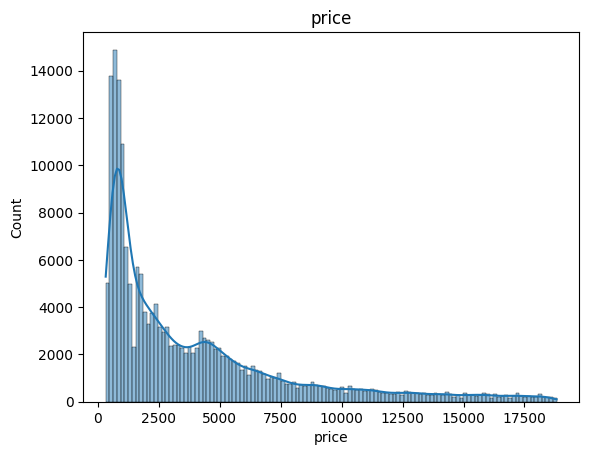

In [18]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.5)
x = 1
for i in numerical_features:
    sns.histplot(data = train_df, x = i, kde=True)
    plt.title(i)
    print('\n')
    plt.show()

### Univariate Analysis of Categorical Columns

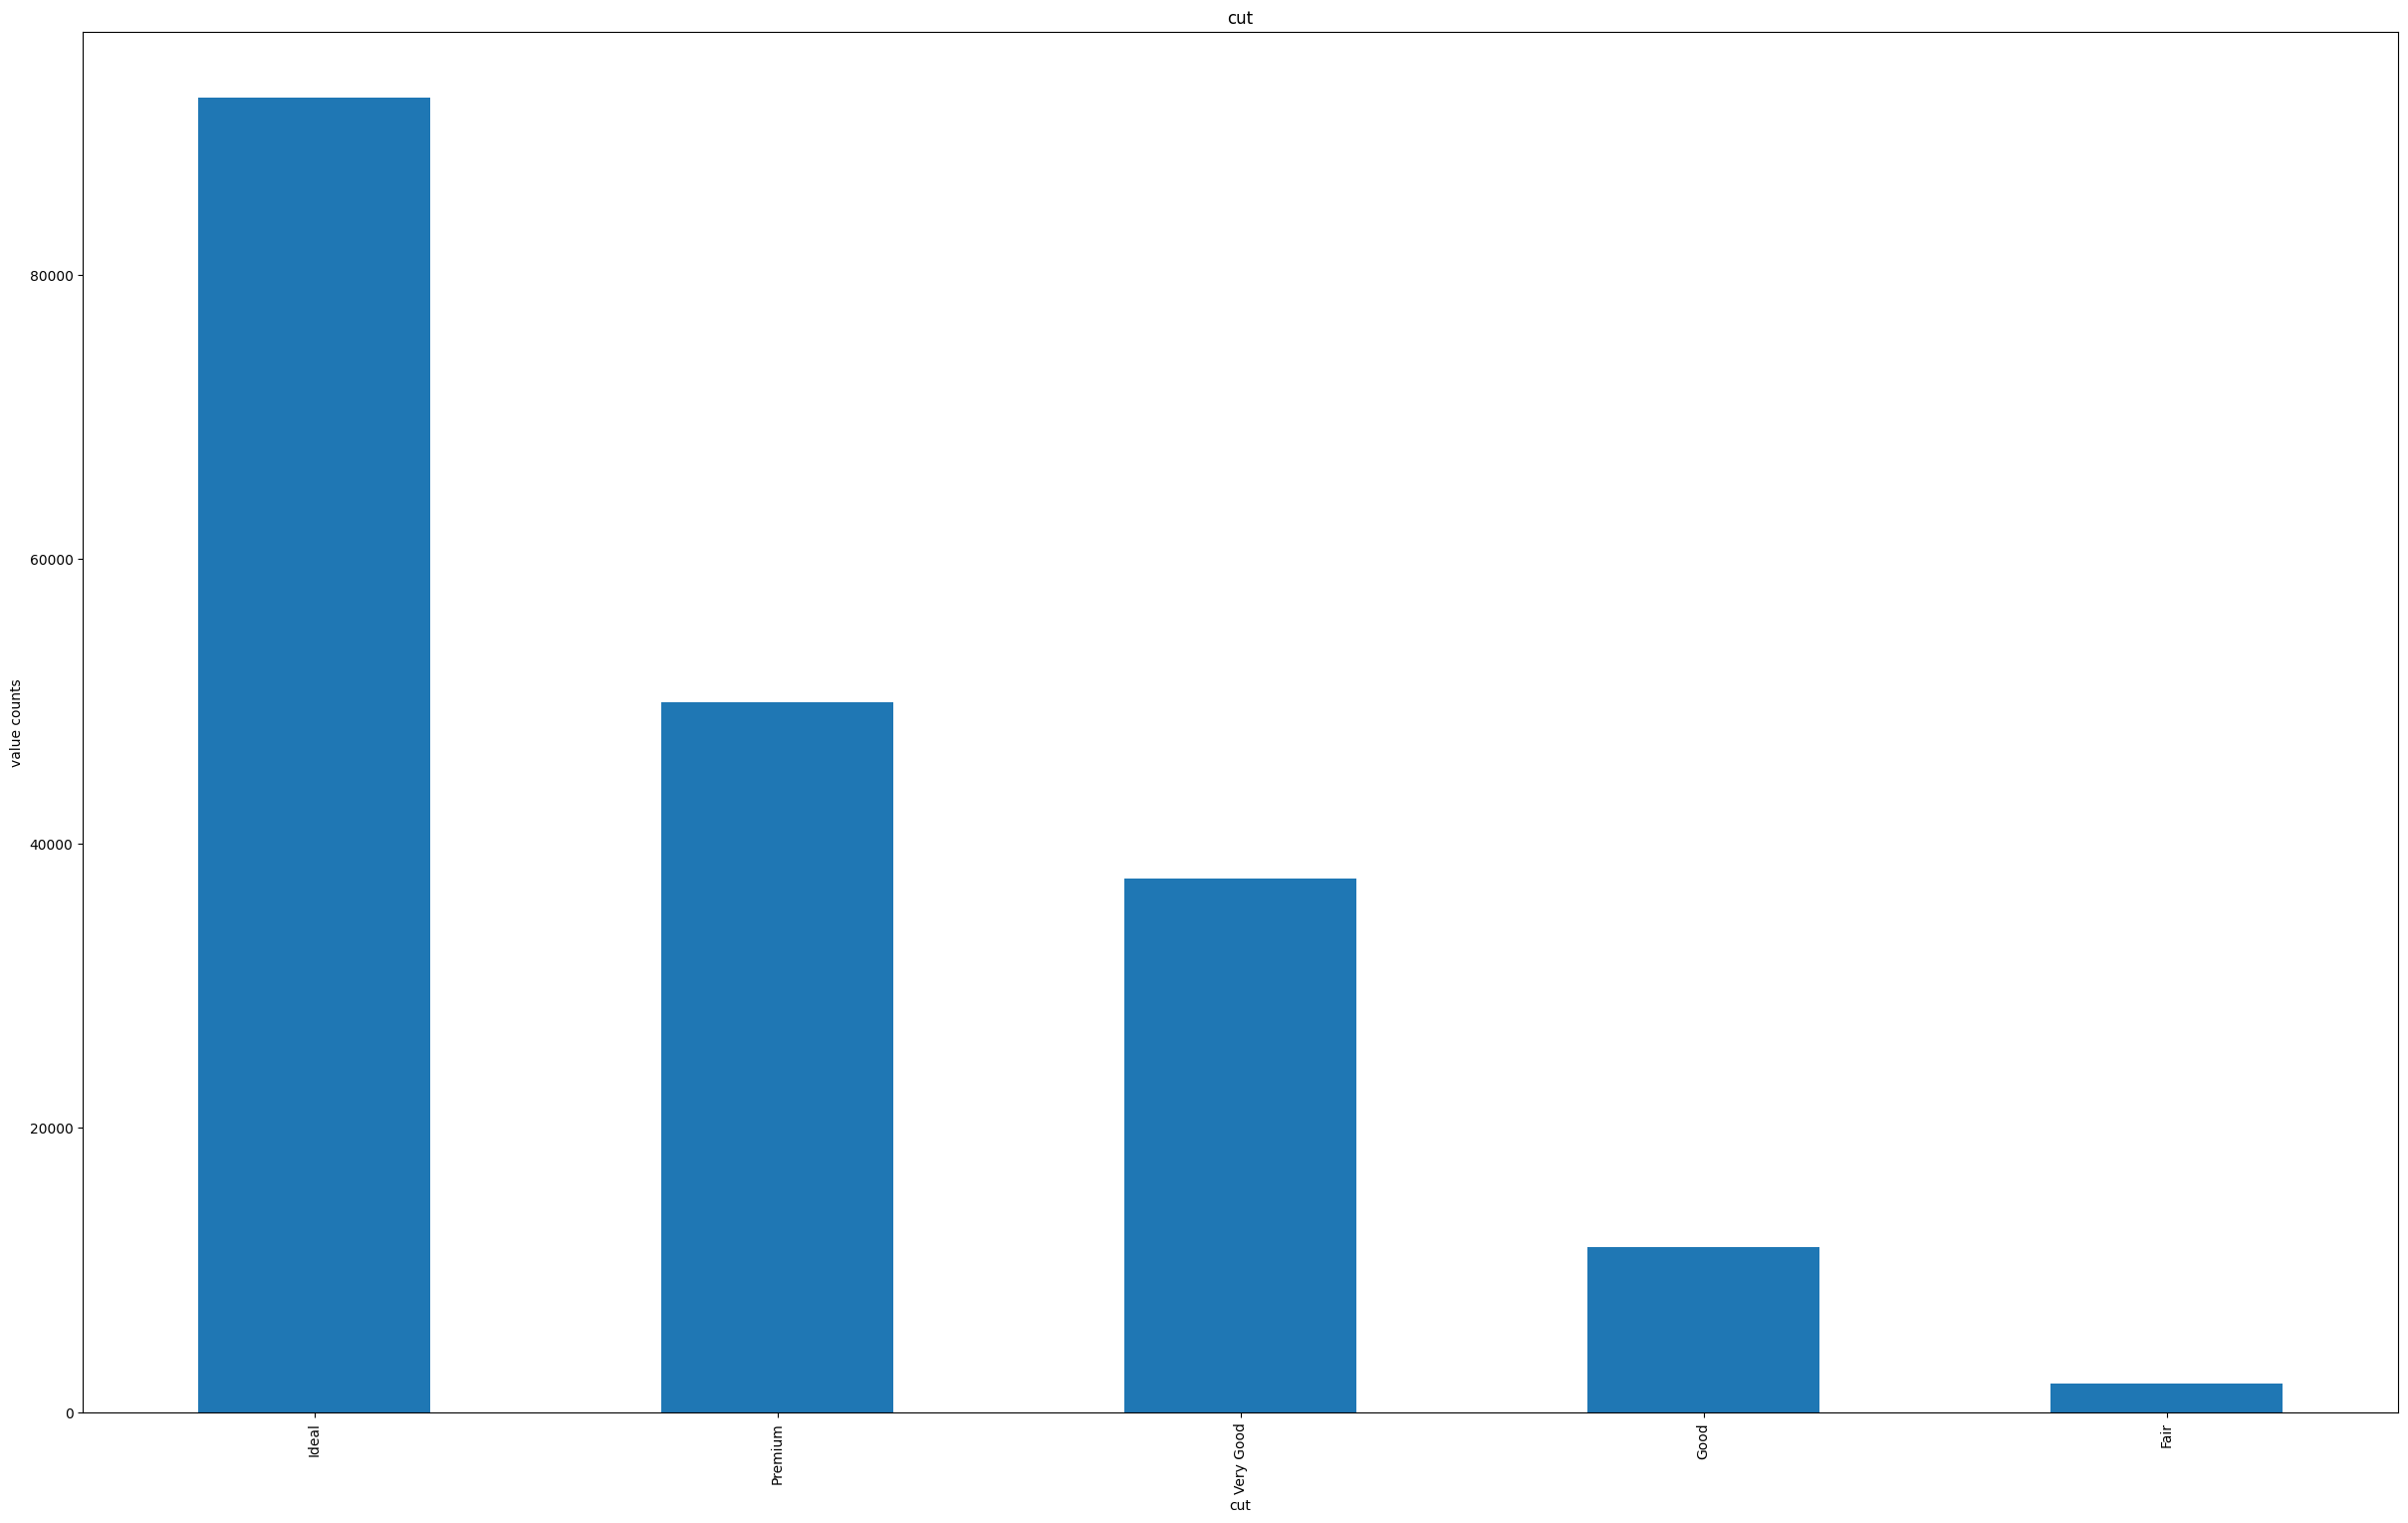

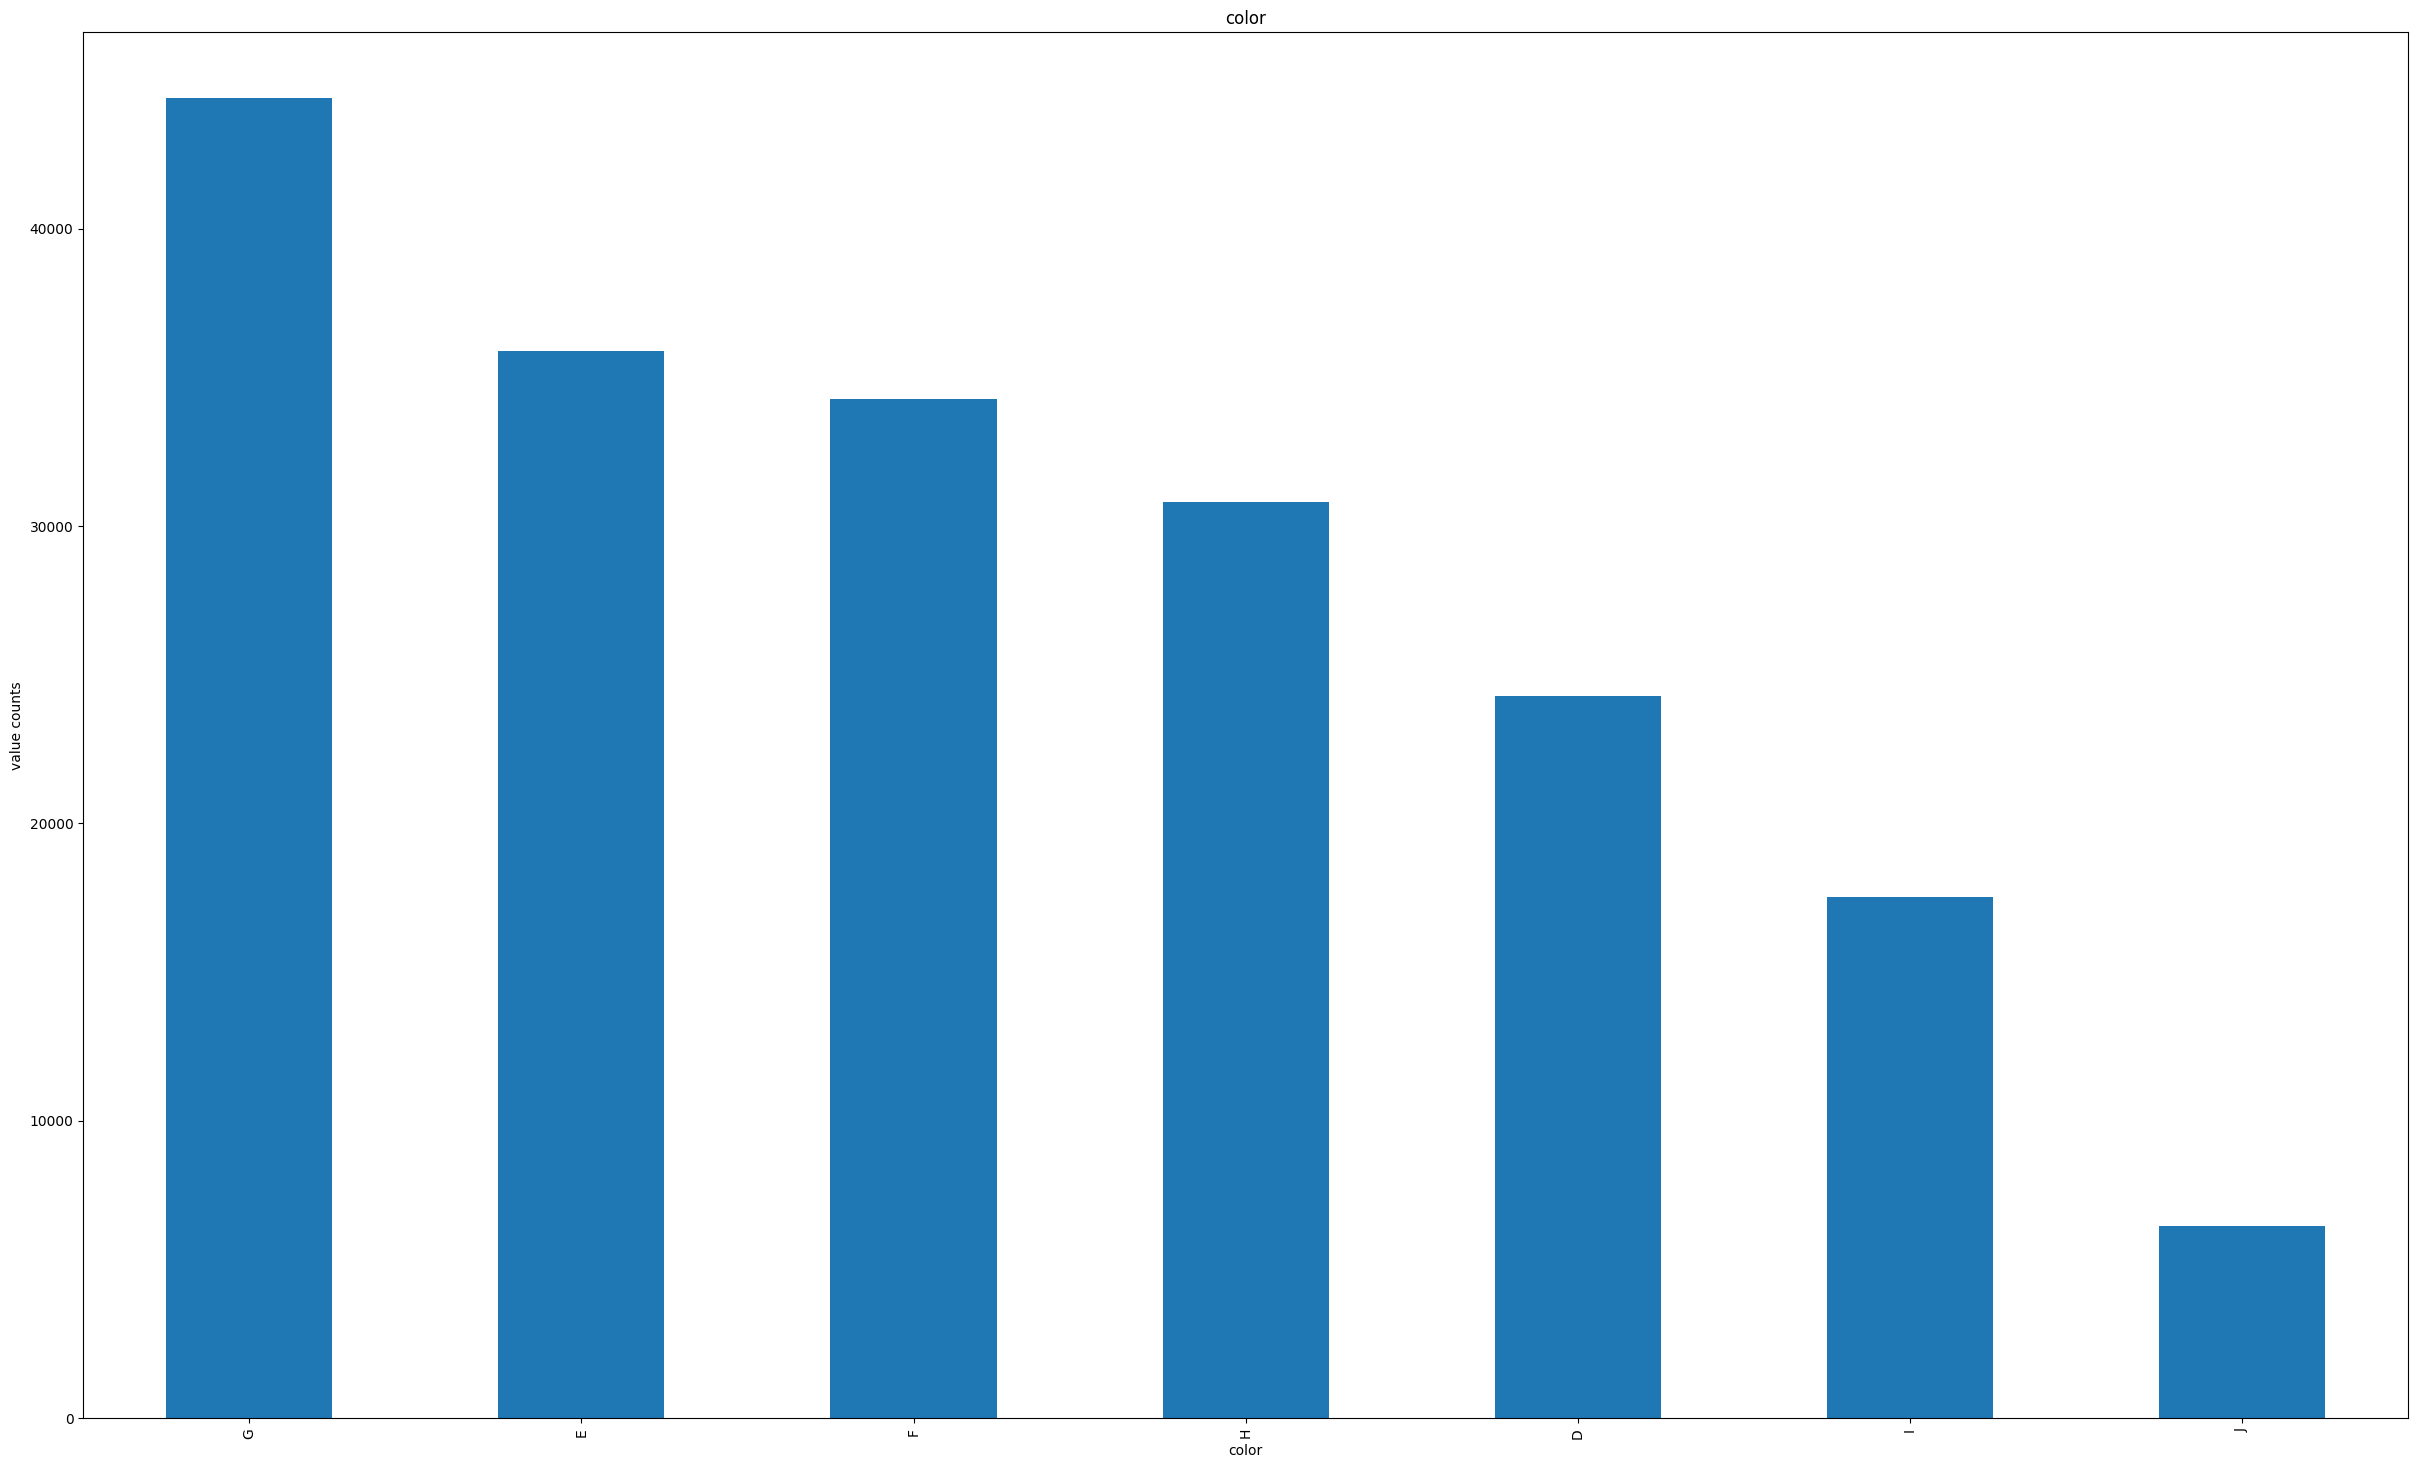

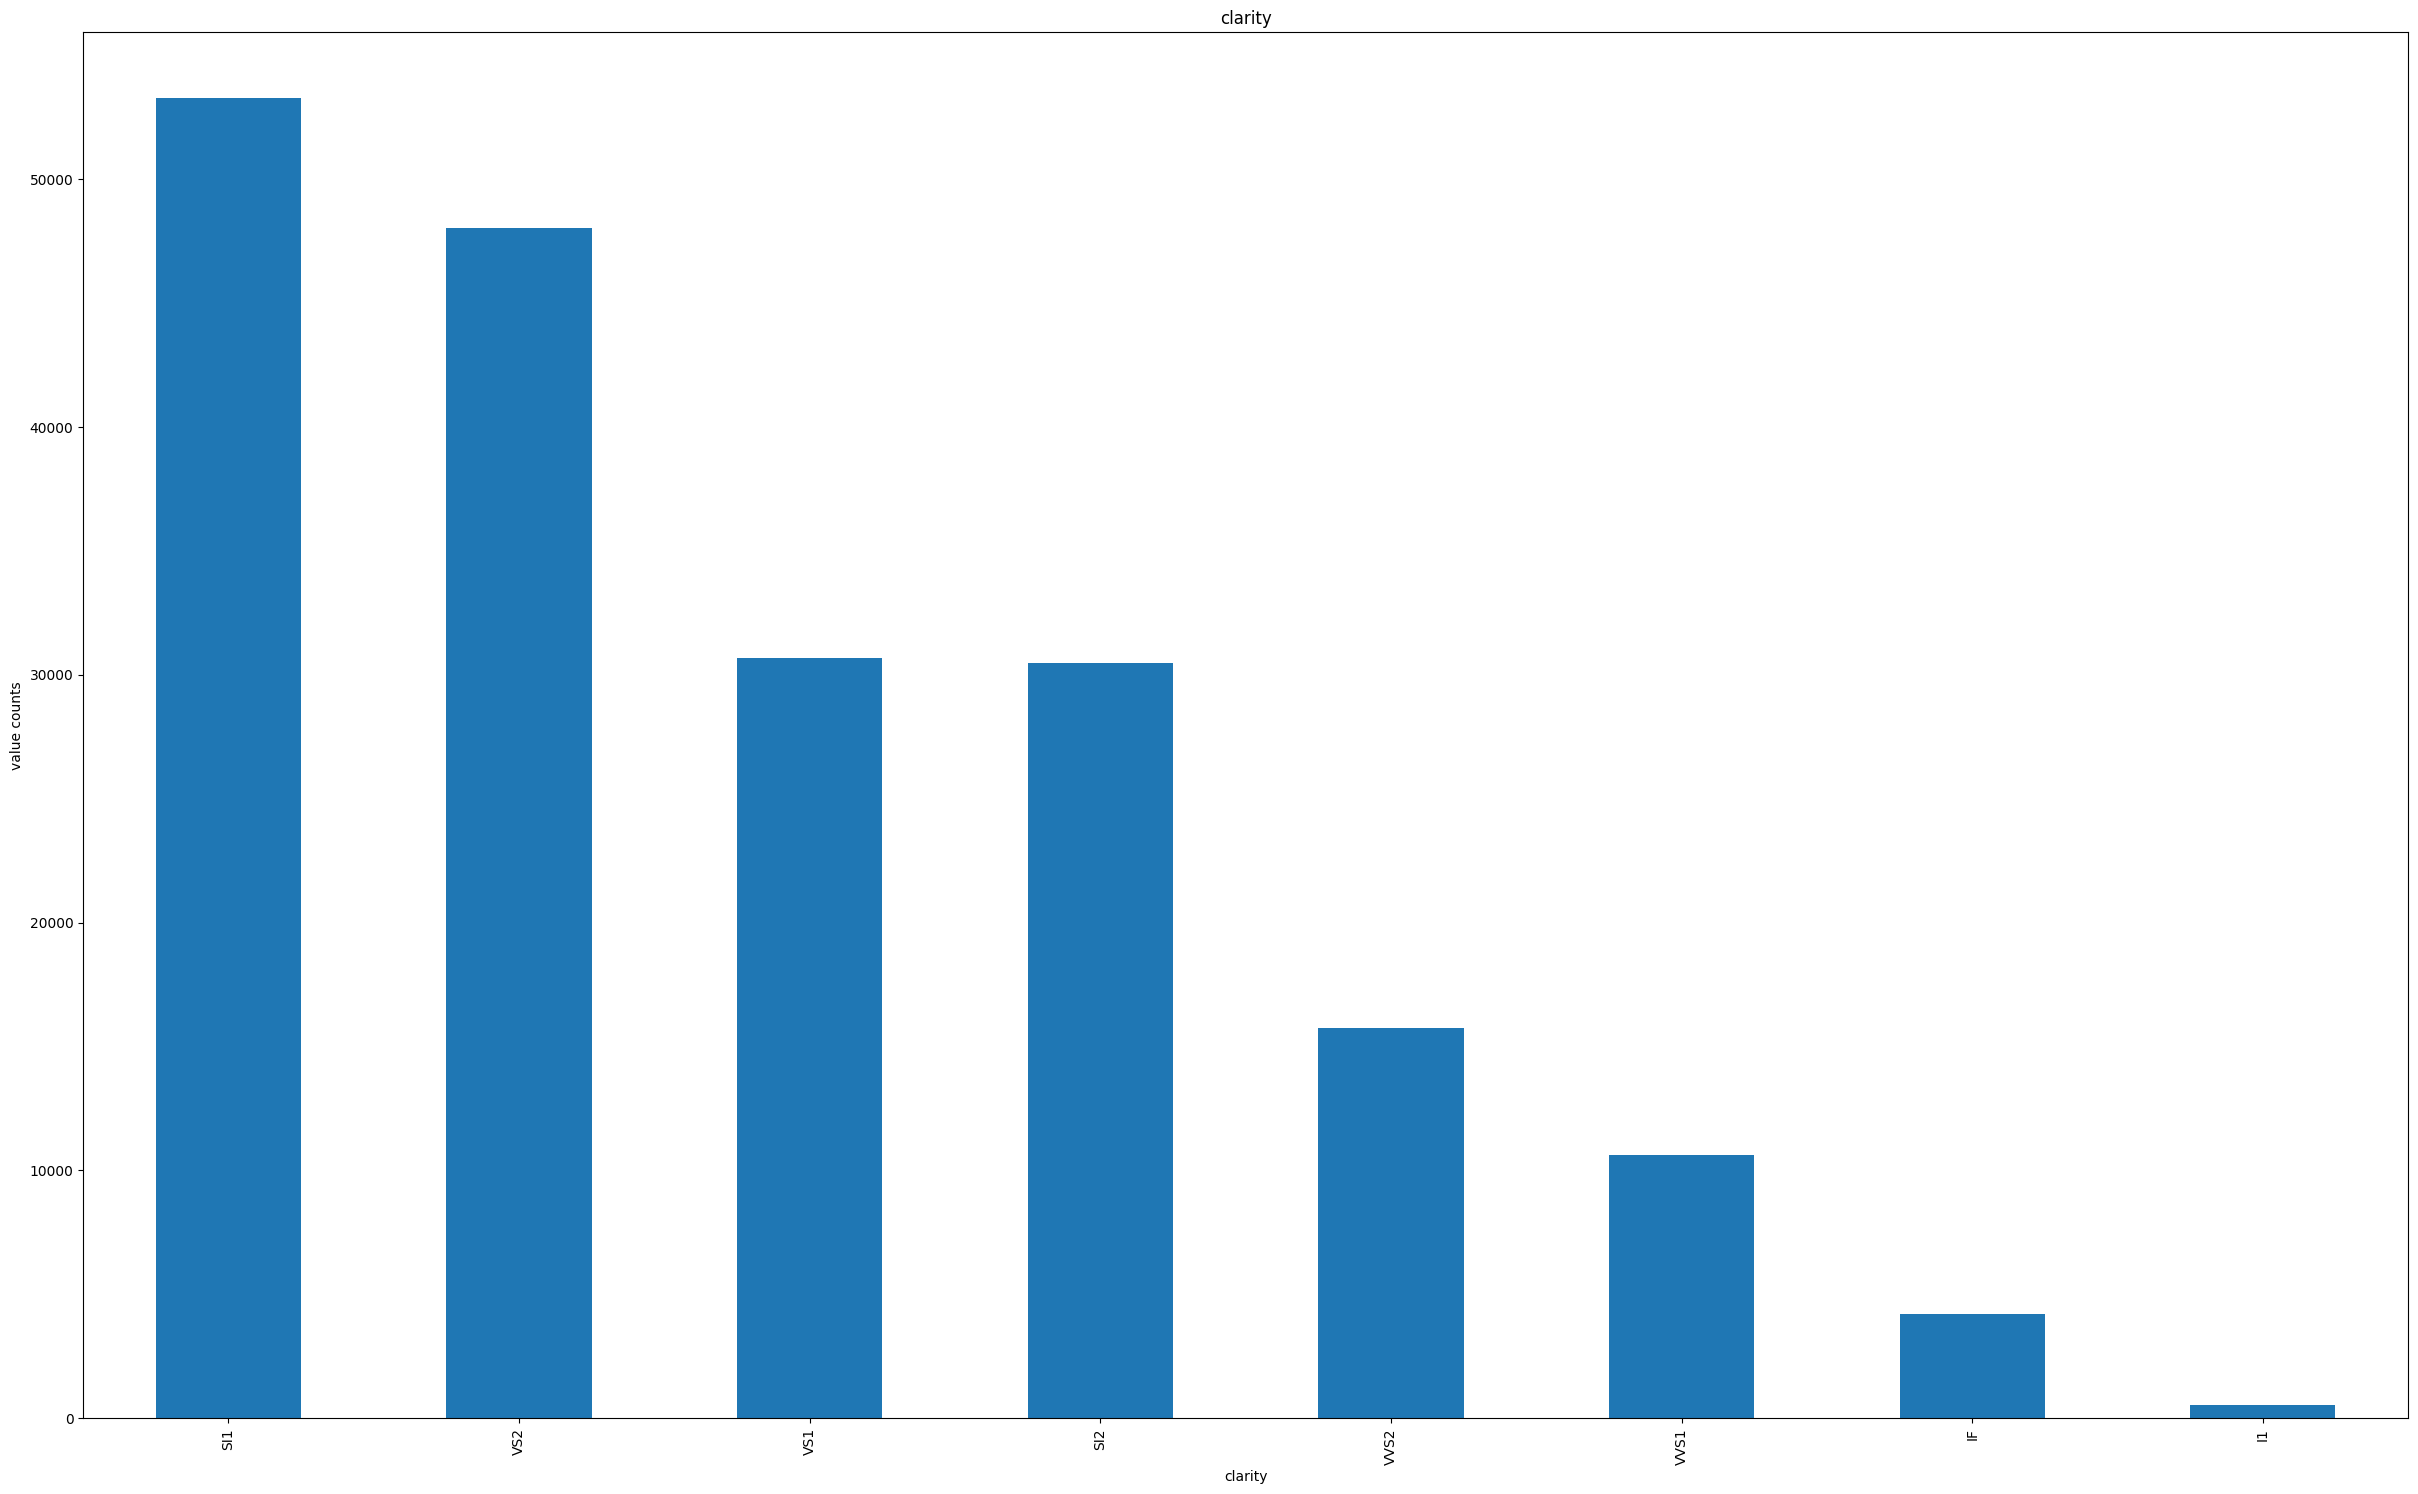

In [45]:
for i in categorical_features:
    train_df[i].value_counts().plot(kind='bar', xlabel = i , ylabel='value counts', title = i)
    print('\n')
    plt.show()

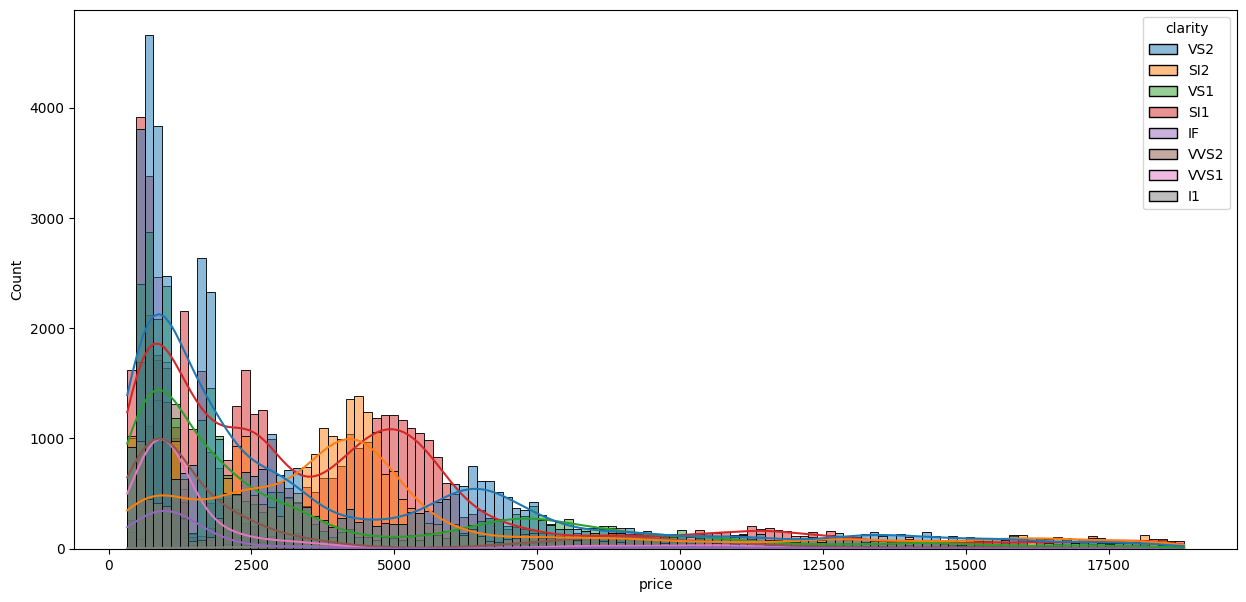

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
sns.histplot(data=train_df, x='price', hue='clarity', kde=True)
plt.show()

- Diamonds with clarity VS2 and SI1 tends to sell more ad I1 rarely sells. 

### Categorical Feature vs Target Features

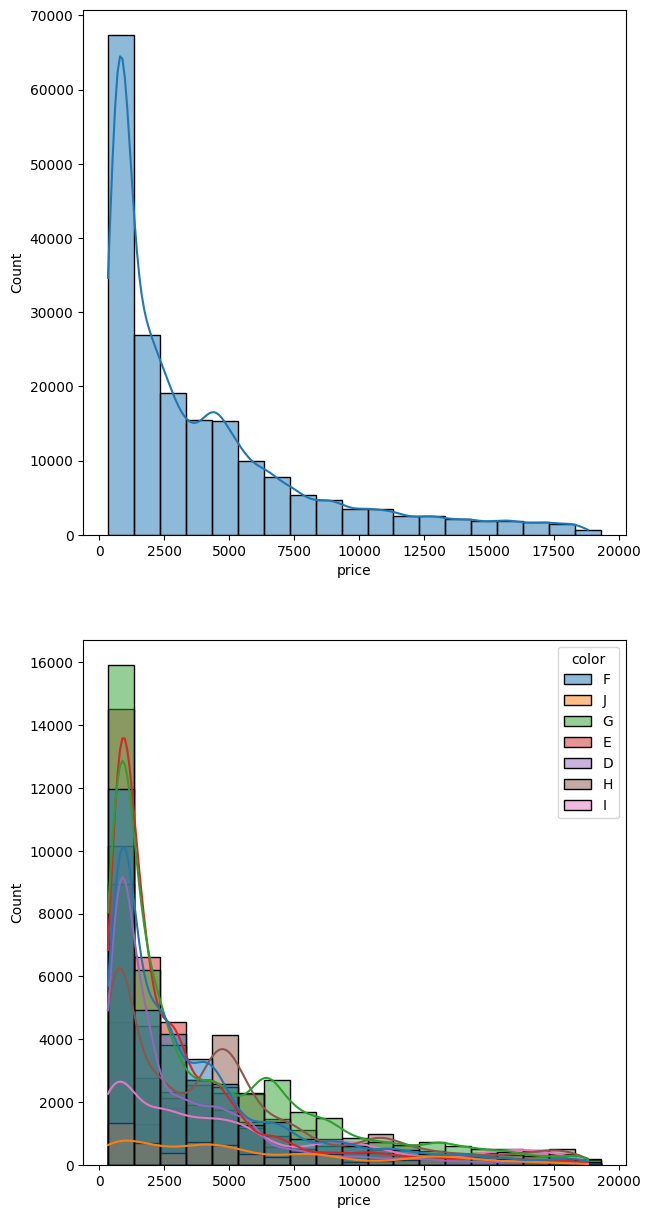

In [32]:
fig, ax = plt.subplots(2, 1, figsize=(7, 15))
sns.histplot(data=train_df, x='price', kde=True, ax=ax[0], binwidth=1000)
sns.histplot(data=train_df, x='price', hue='color', kde=True, ax=ax[1], binwidth=1000)
plt.show()

In [ ]:
print(numerical_features)
print(categorical_features)

['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
['cut', 'color', 'clarity']


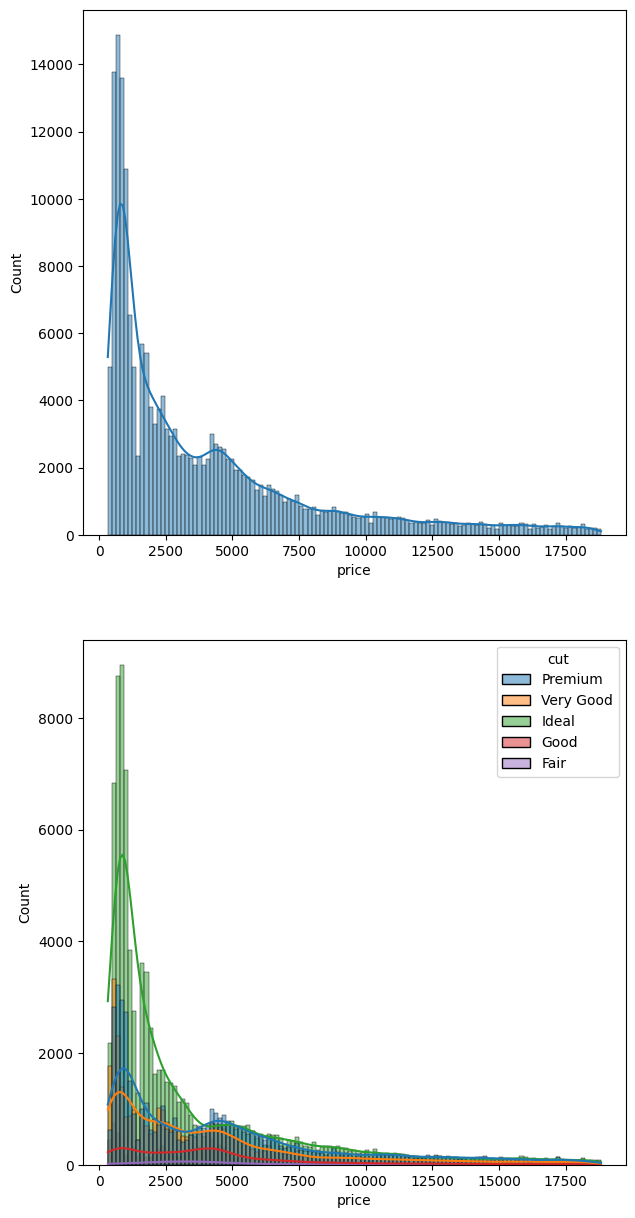

In [33]:
fig, ax = plt.subplots(2, 1, figsize=(7, 15))
sns.histplot(data=train_df, x='price', kde=True, ax=ax[0])
sns.histplot(data=train_df, x='price', hue='cut', kde=True, ax=ax[1])
plt.show()

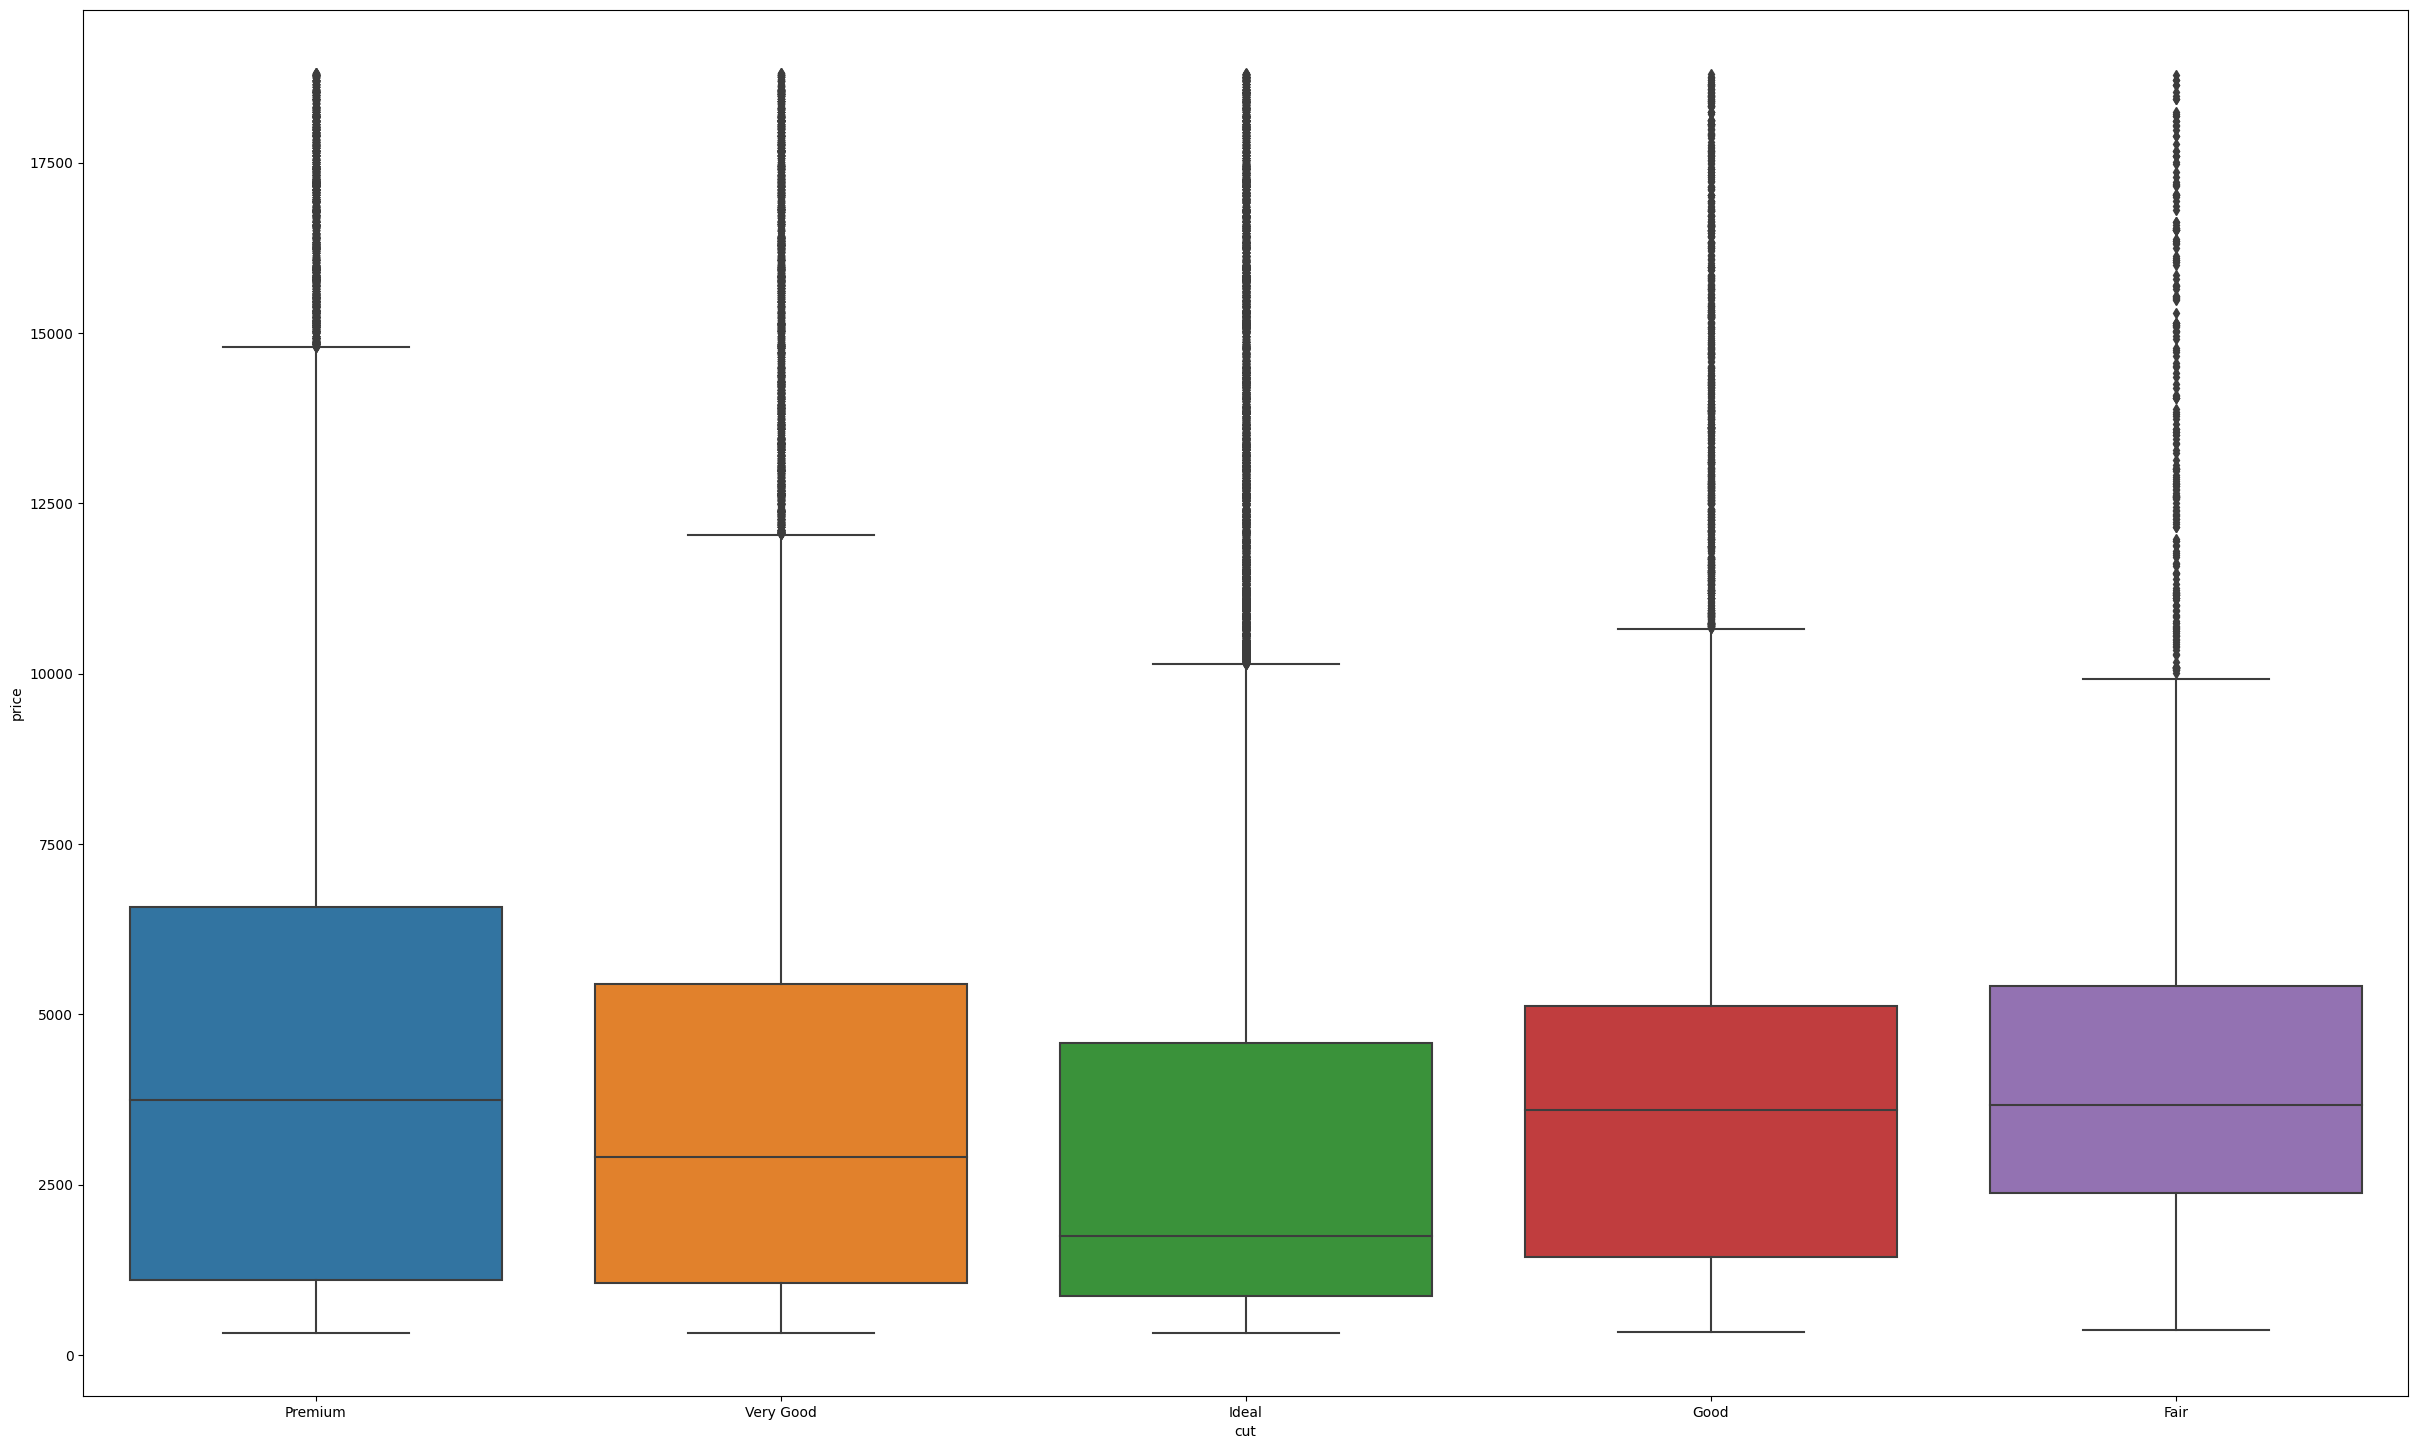

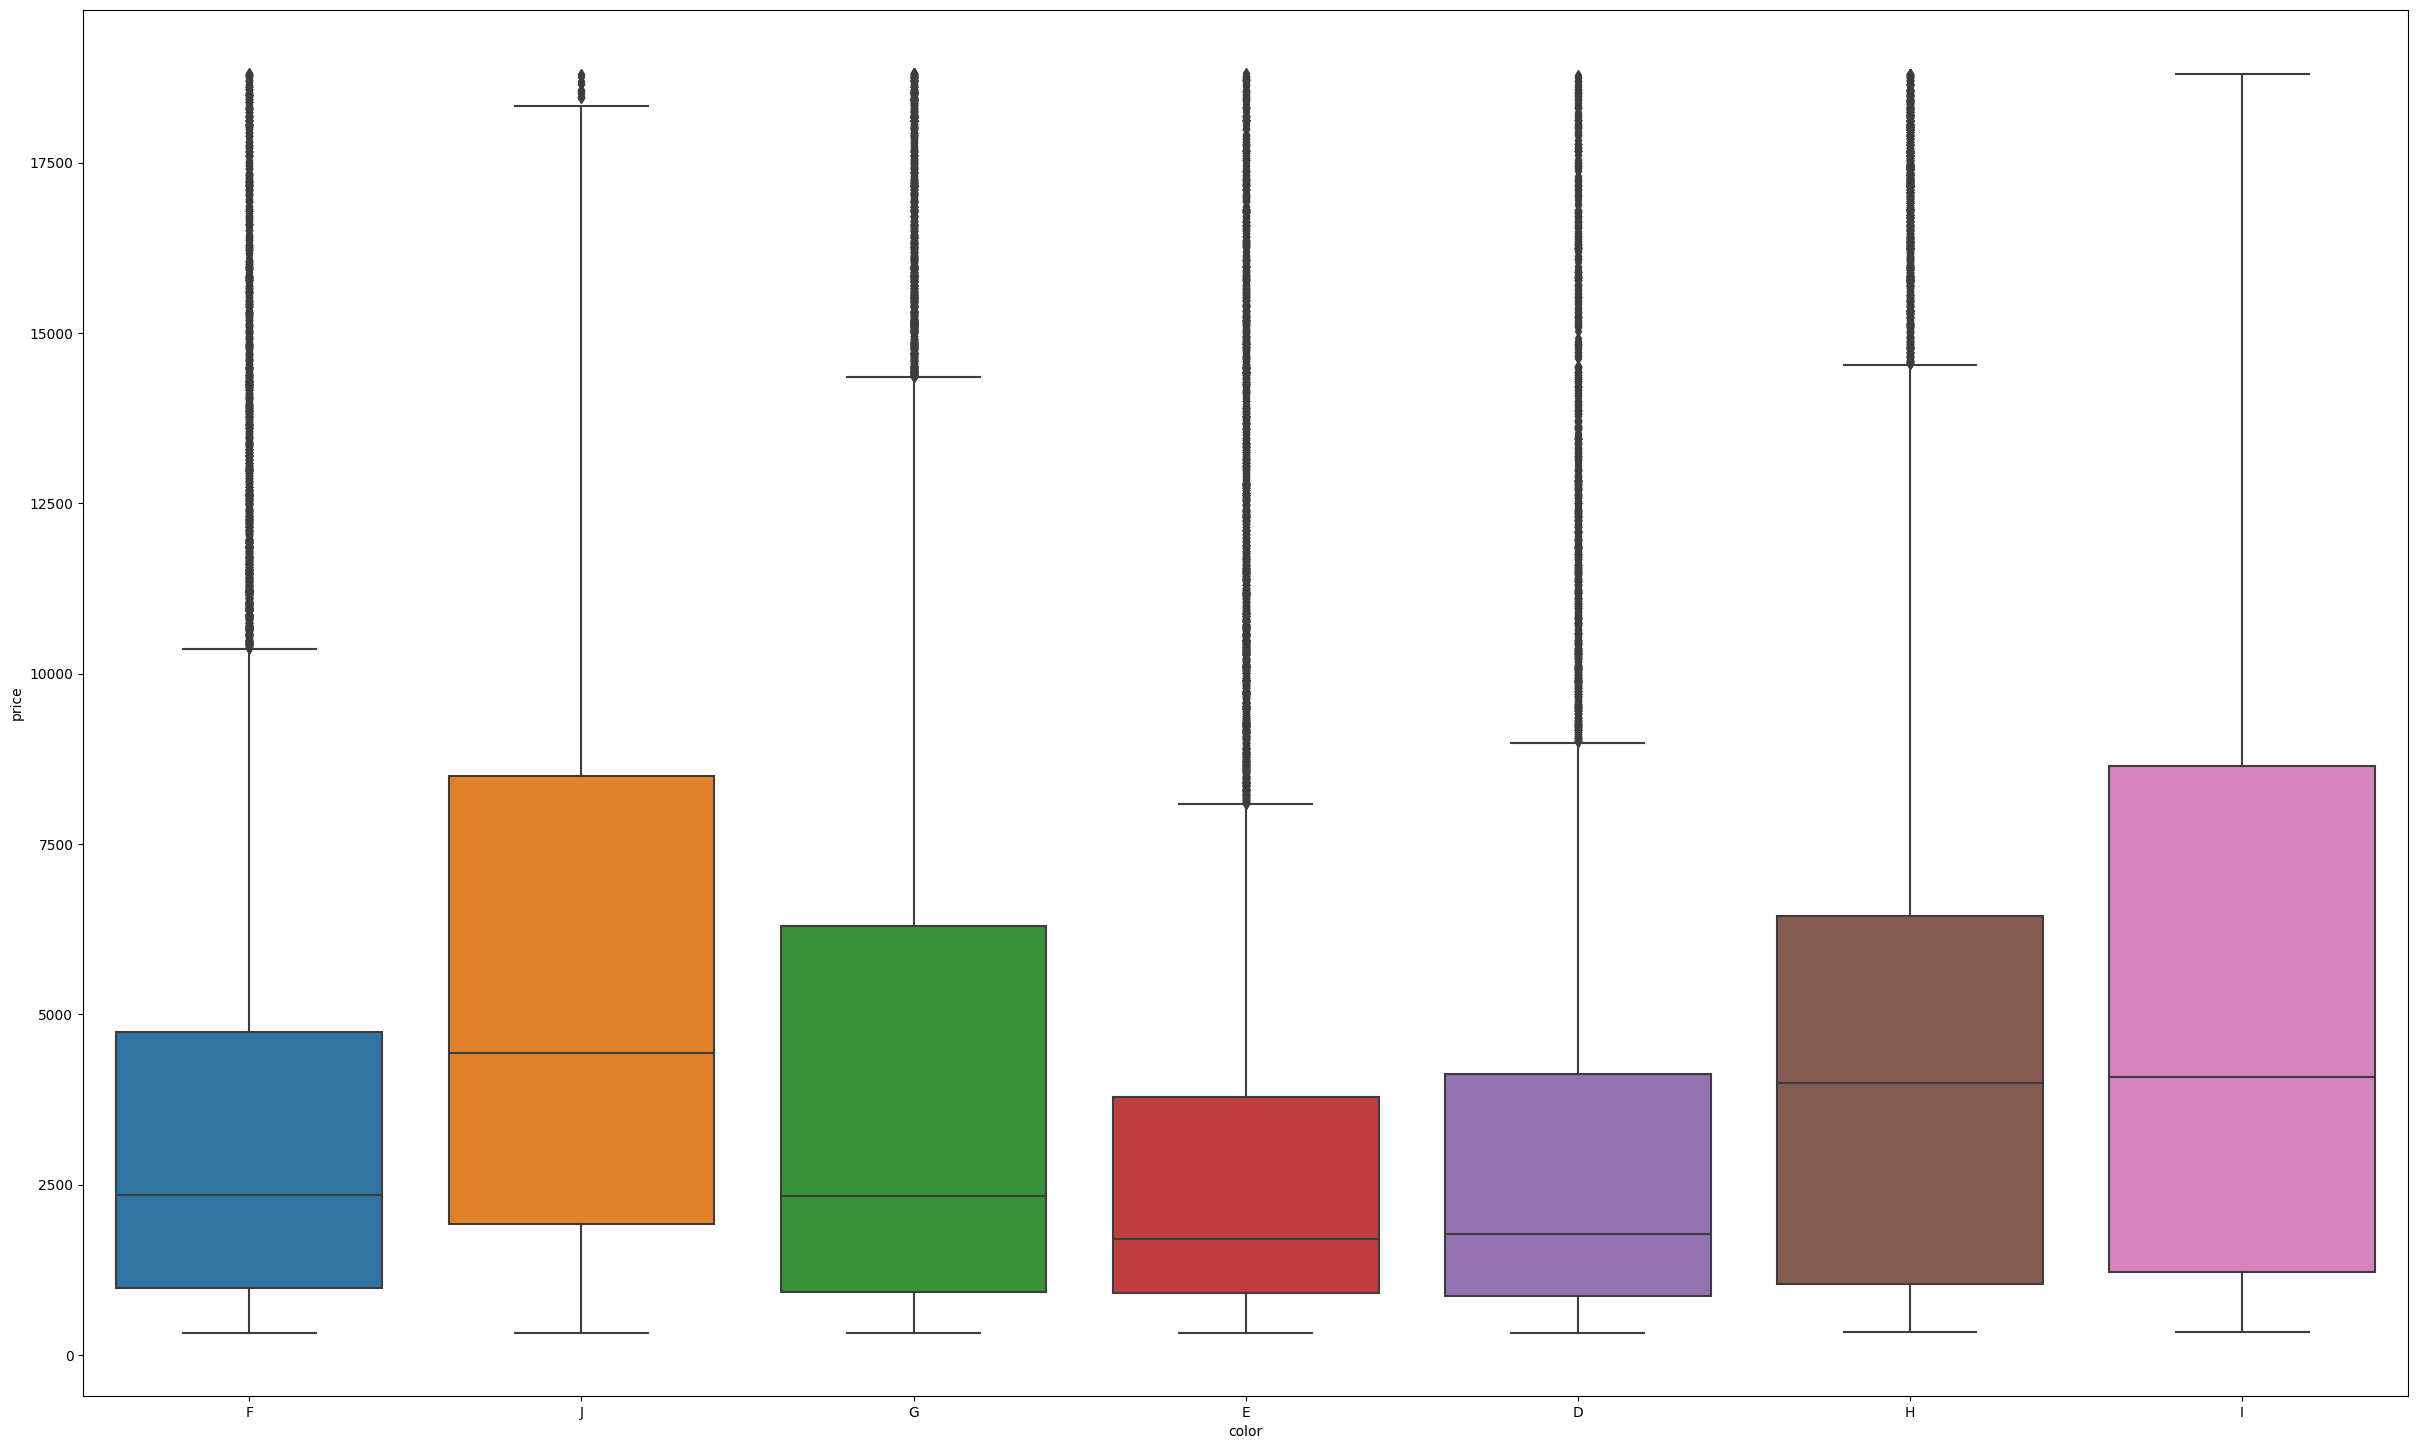

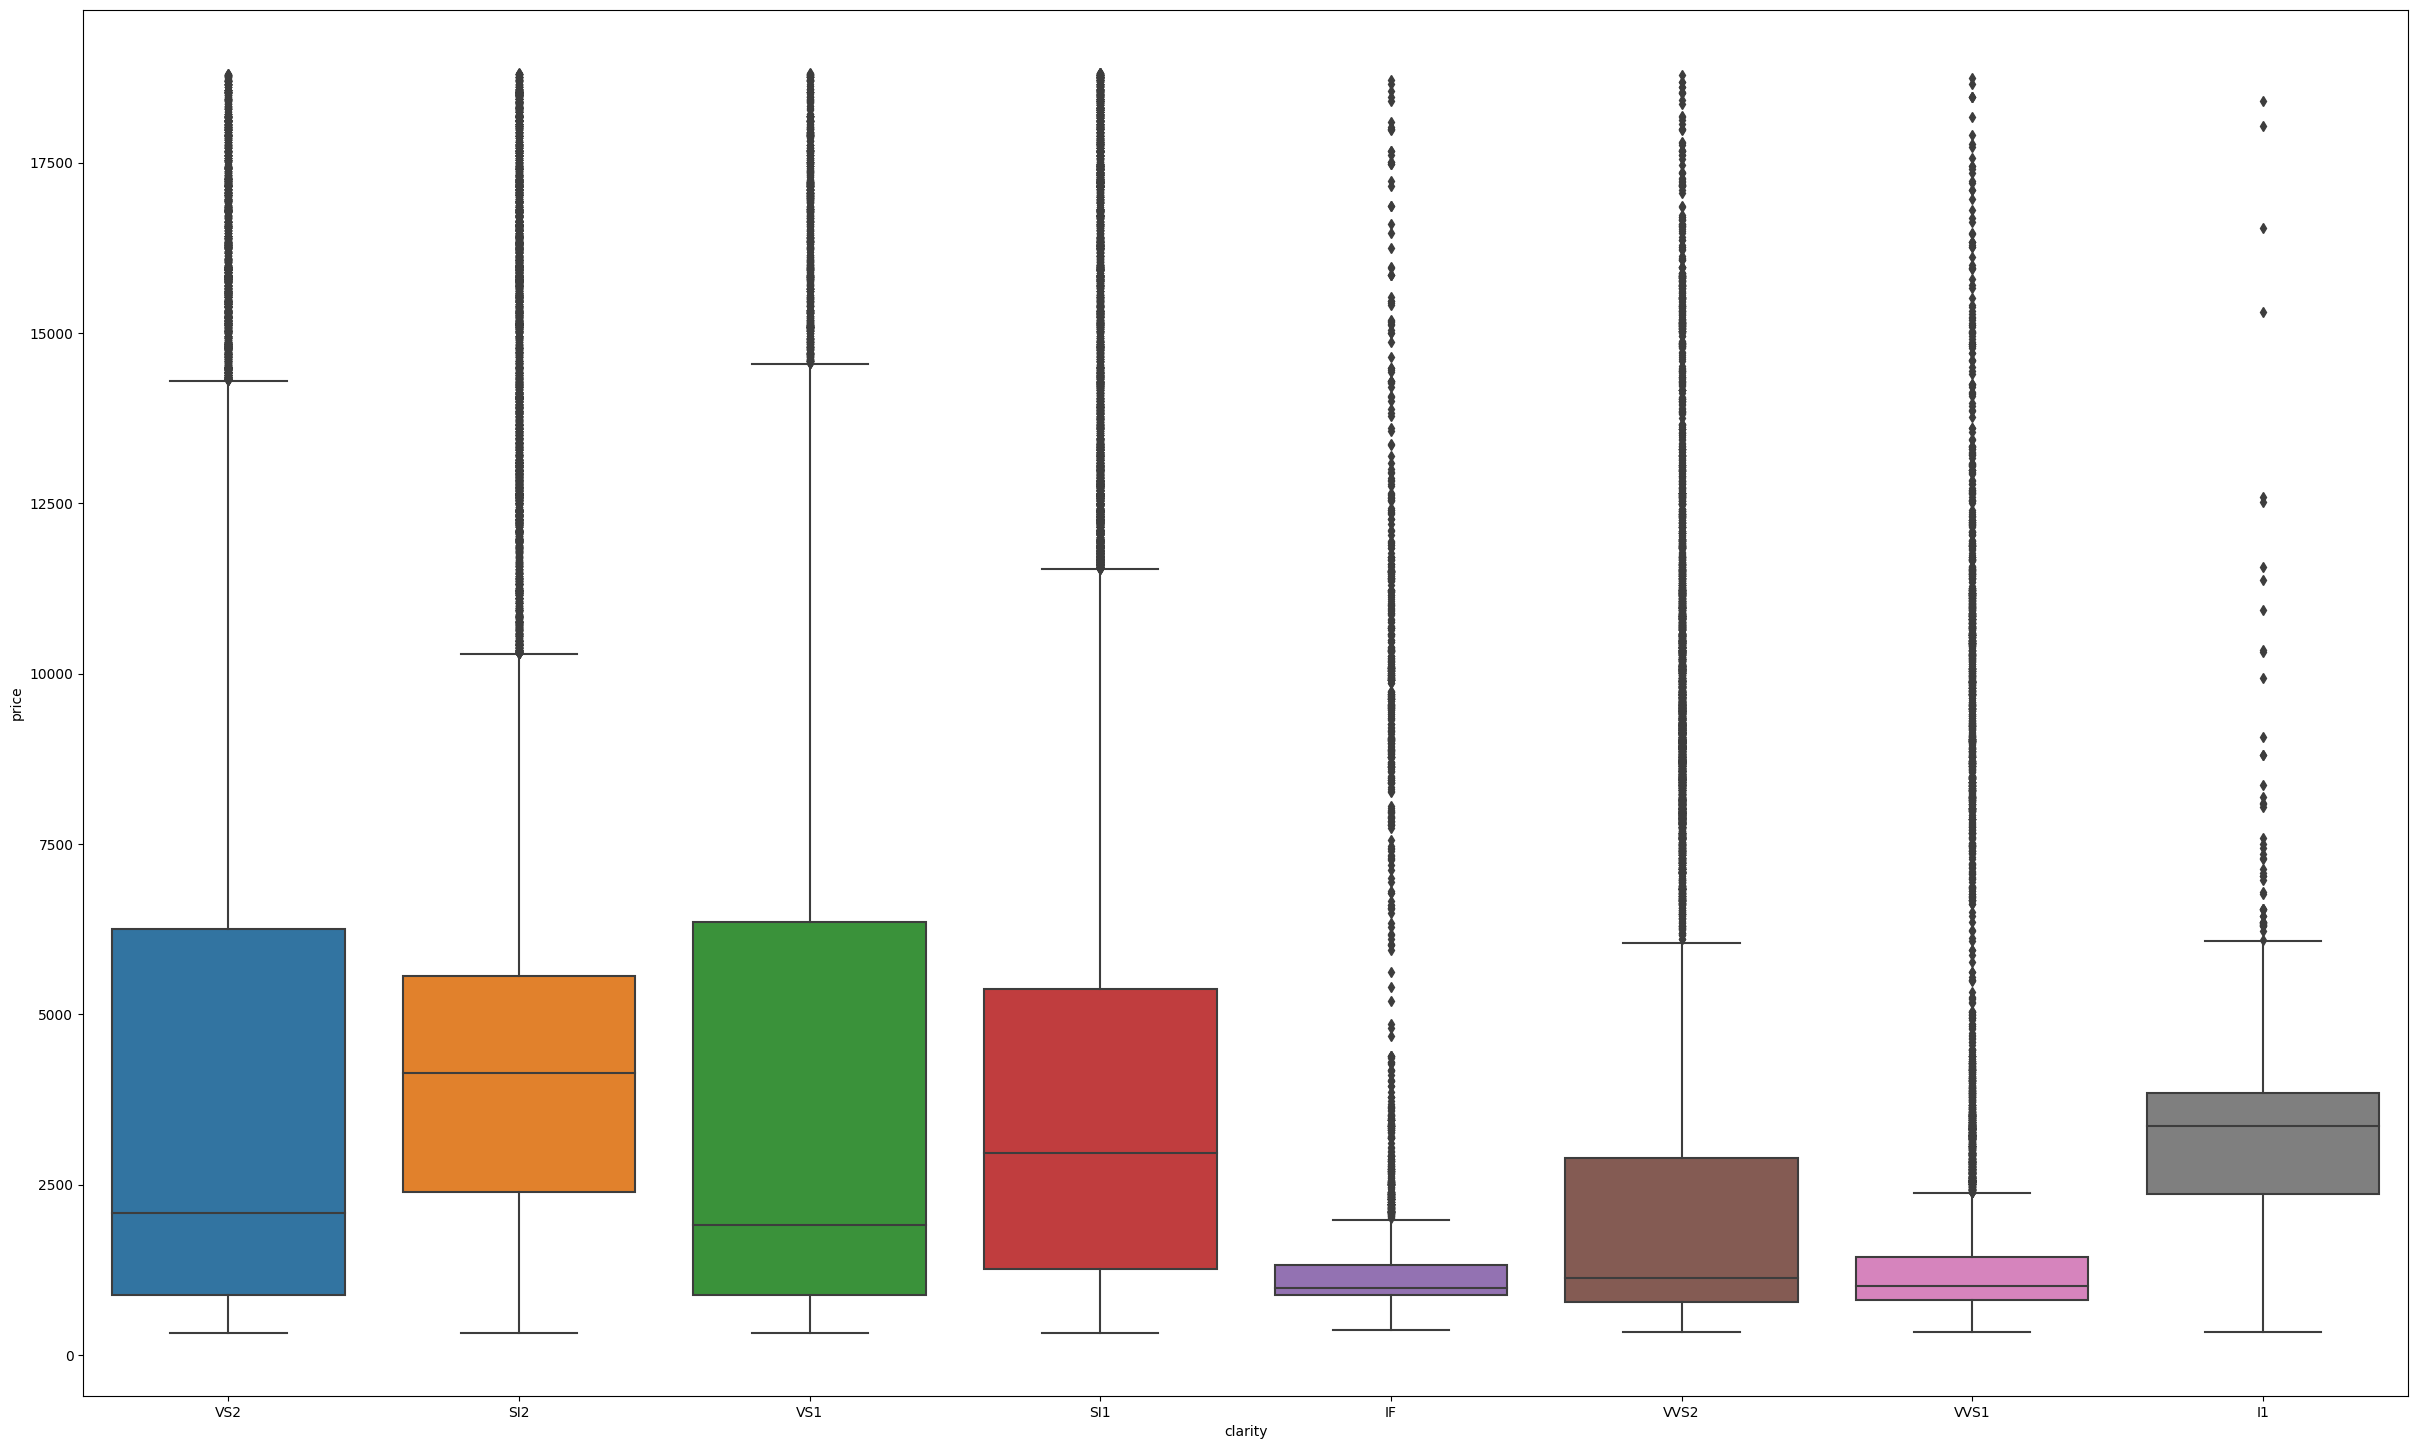

In [49]:
for i in categorical_features:
    sb.boxplot(data=train_df, x=i , y='price')
    plt.show()

### Multivariate Analysis

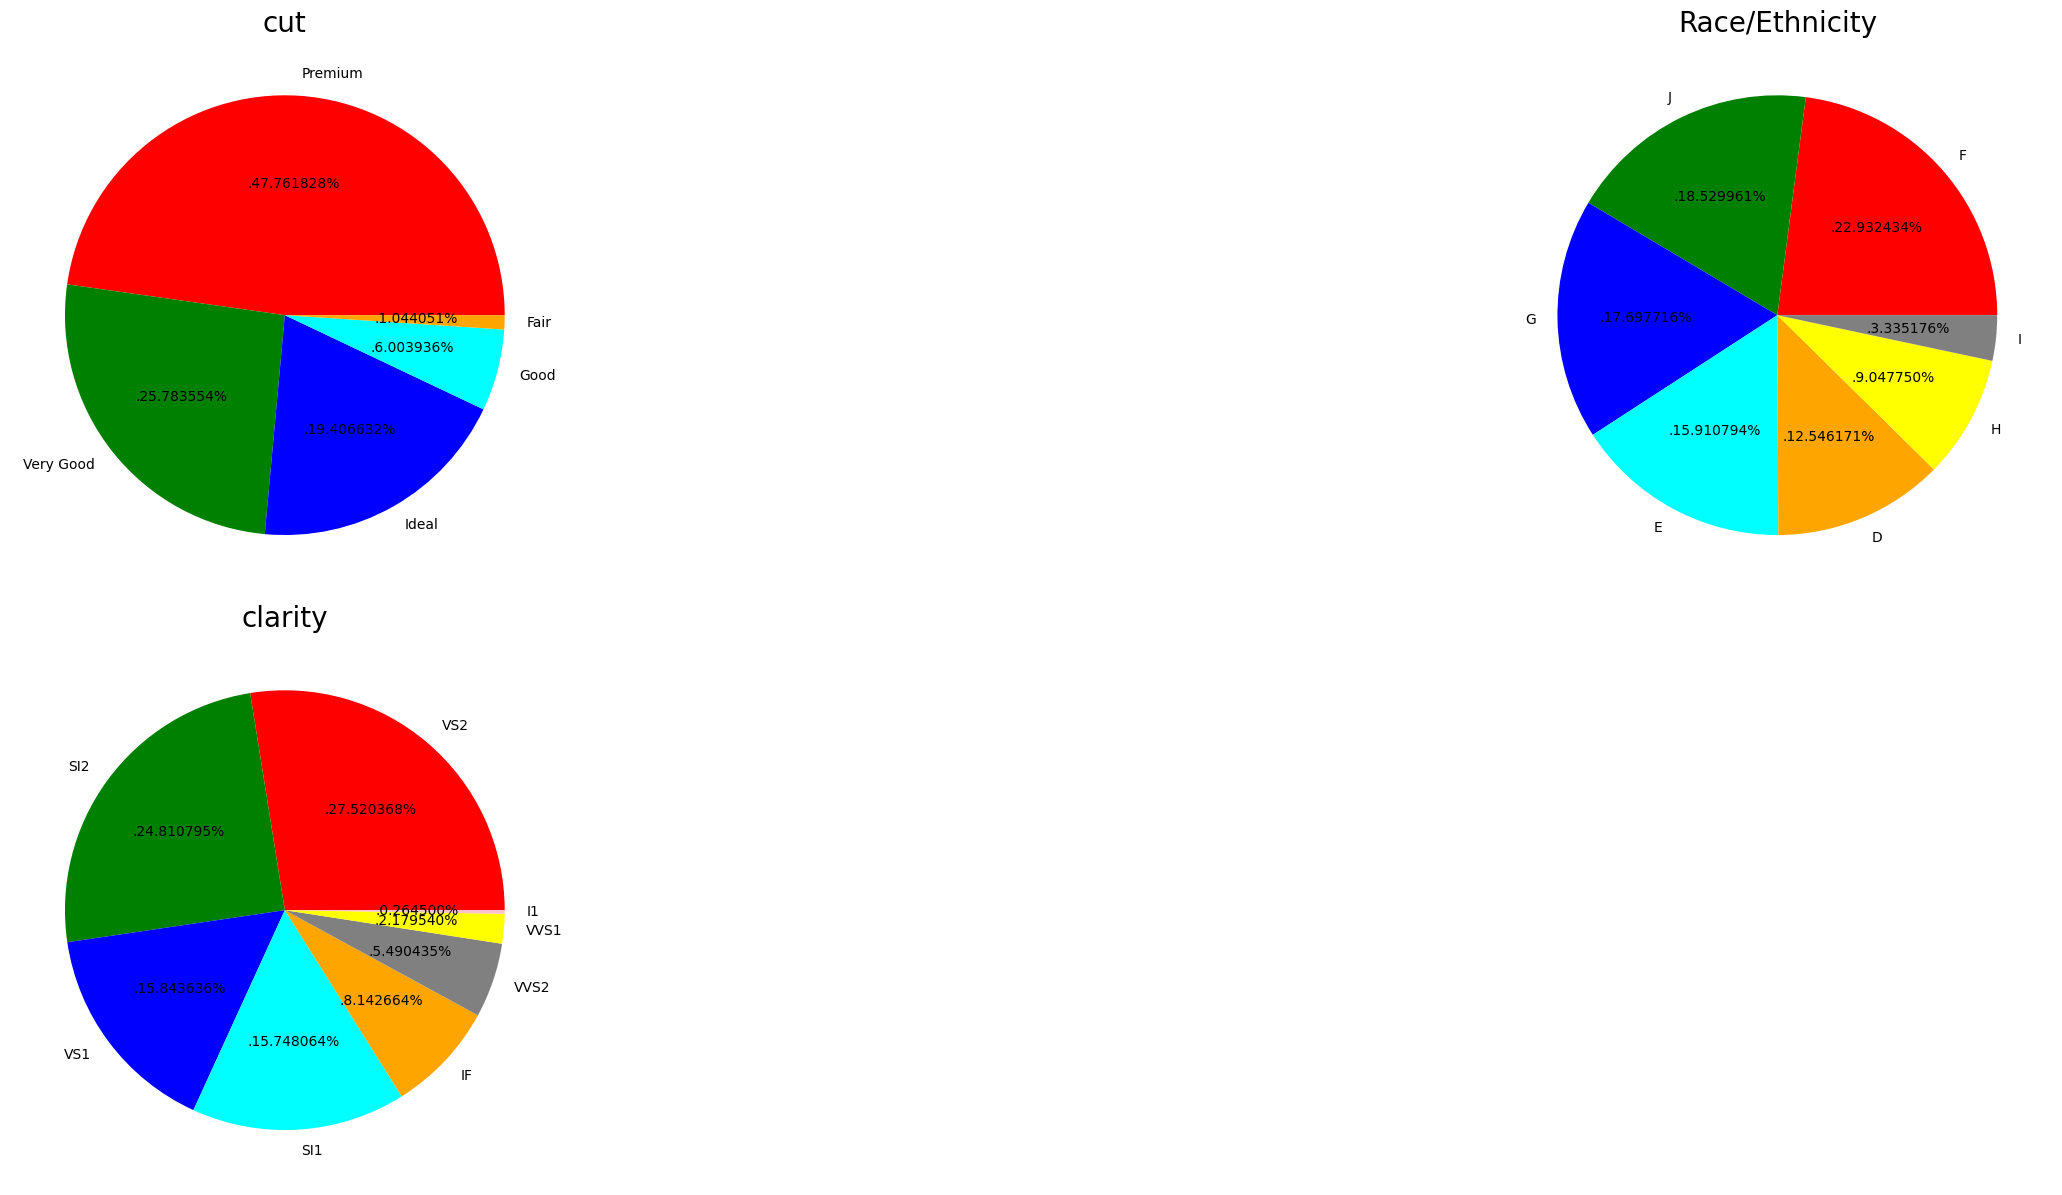

In [40]:
plt.rcParams['figure.figsize'] = (30, 18)

plt.subplot(3, 2, 1)
size = train_df['cut'].value_counts()
labels = 'Premium', 'Very Good', 'Ideal', 'Good', 'Fair'
color = ['red', 'green', 'blue', 'cyan','orange']


plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('cut', fontsize = 20)
plt.axis('off')



plt.subplot(3, 2, 2)
size = train_df['color'].value_counts()
labels = 'F', 'J', 'G', 'E', 'D', 'H', 'I'
color = ['red', 'green', 'blue', 'cyan','orange', 'yellow', 'grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(3, 2, 3)
size = train_df['clarity'].value_counts()
labels = 'VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'
color = ['red', 'green', 'blue', 'cyan','orange', 'grey', 'yellow', 'pink']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('clarity', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

### Heat Map

<Axes: >

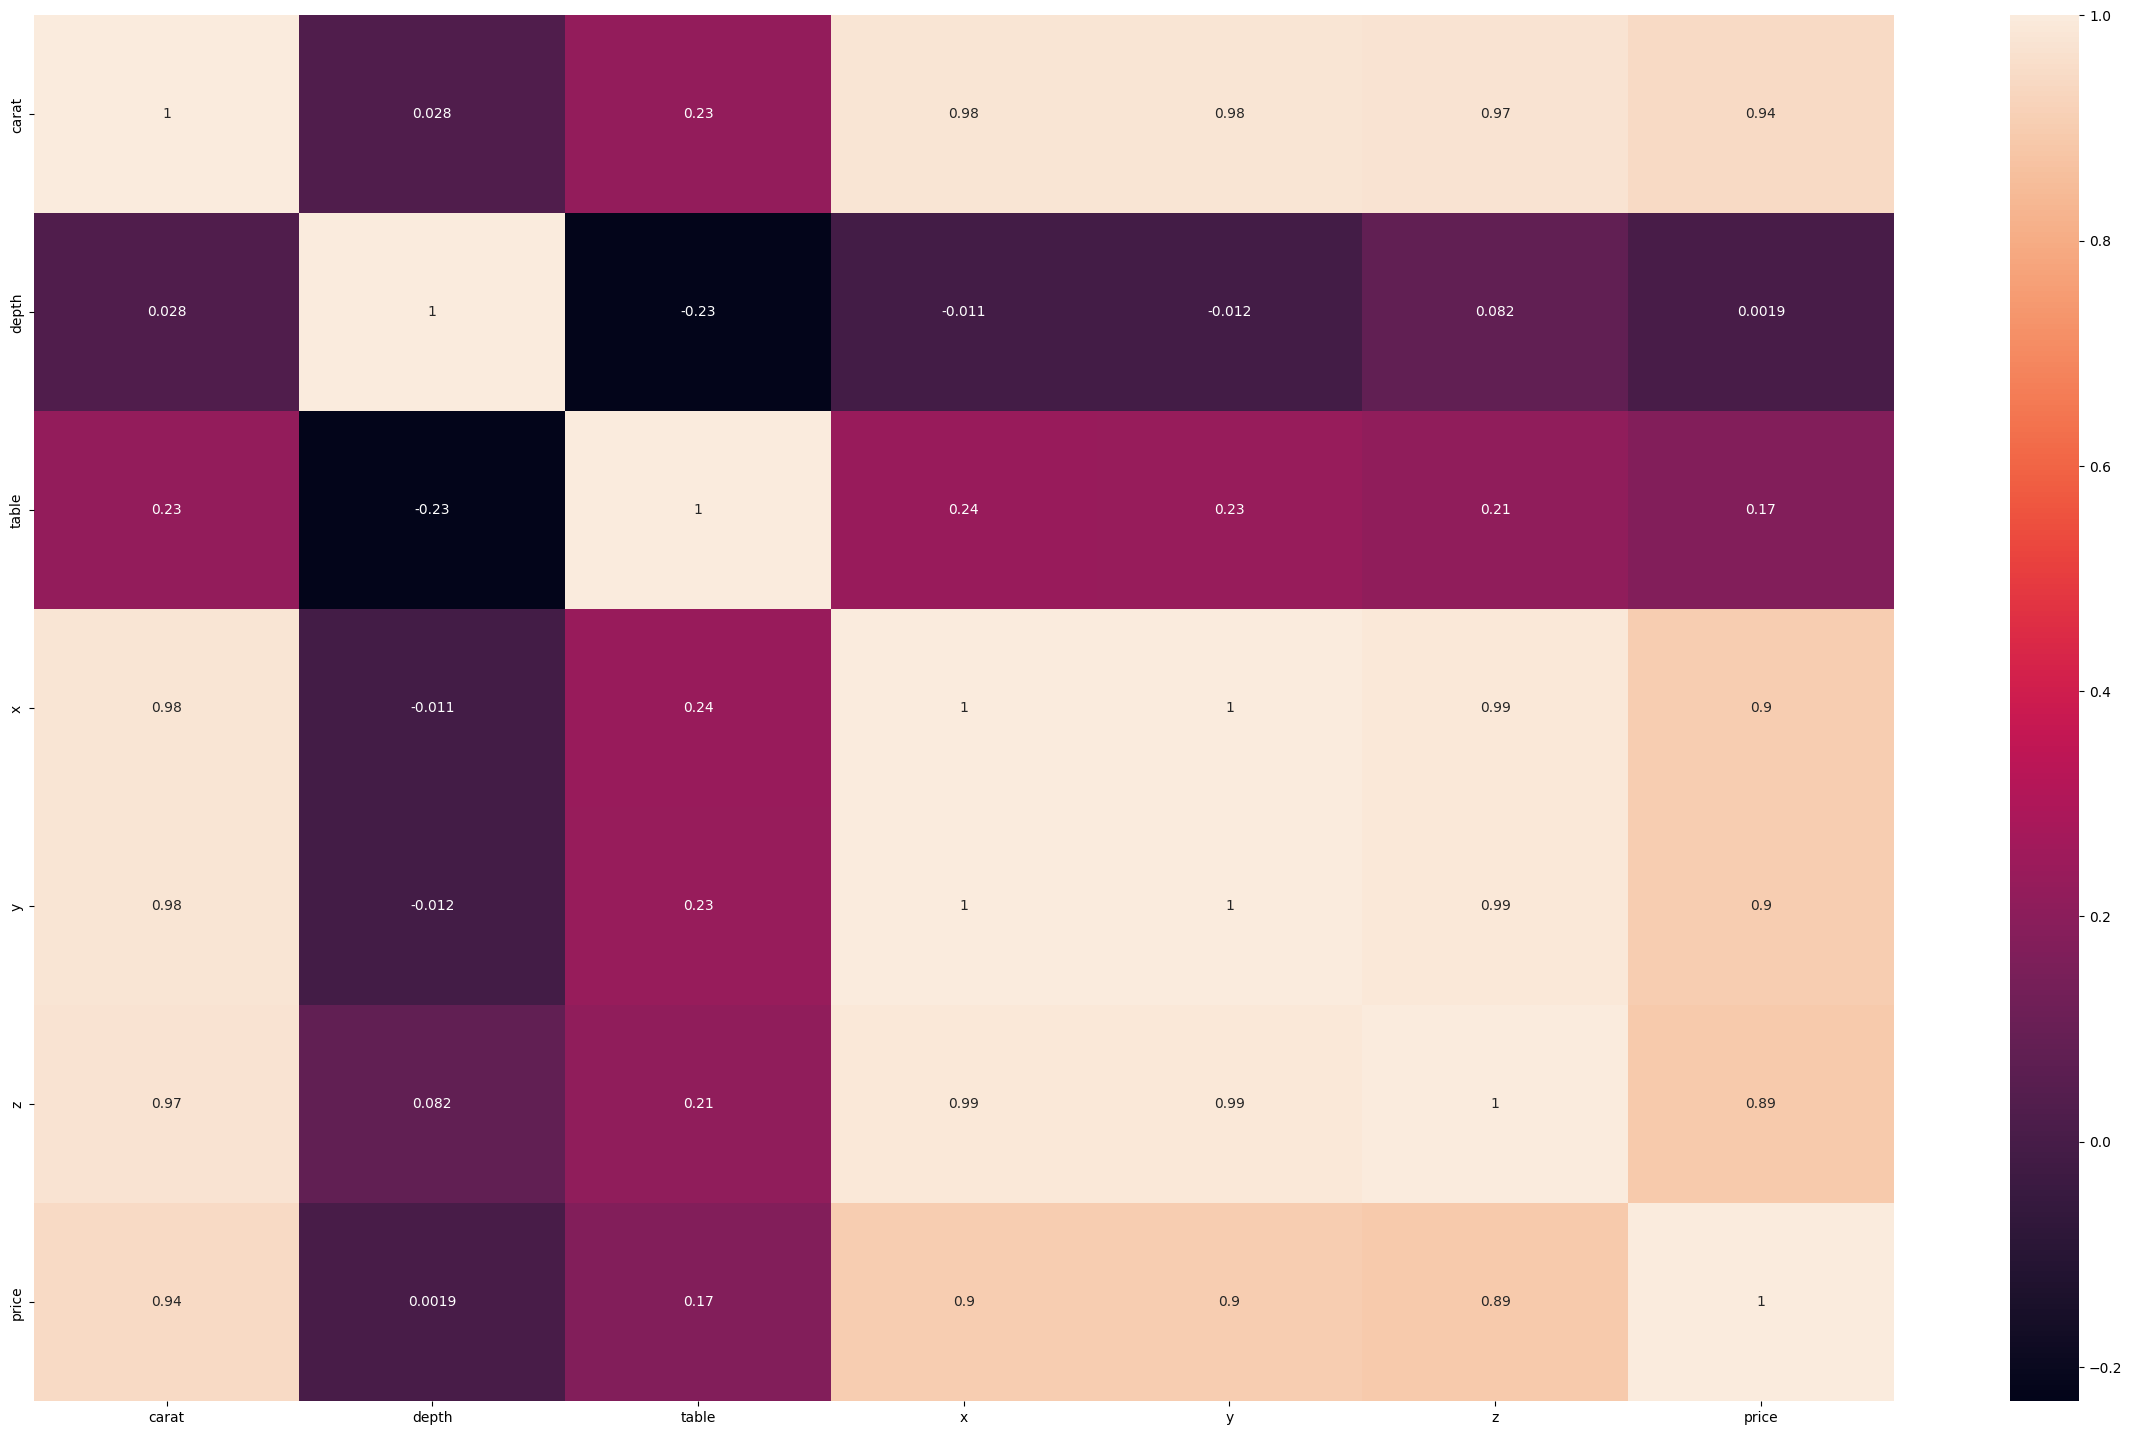

In [46]:
sns.heatmap(train_df.corr(numeric_only=True), annot=True)

### Pair Plot

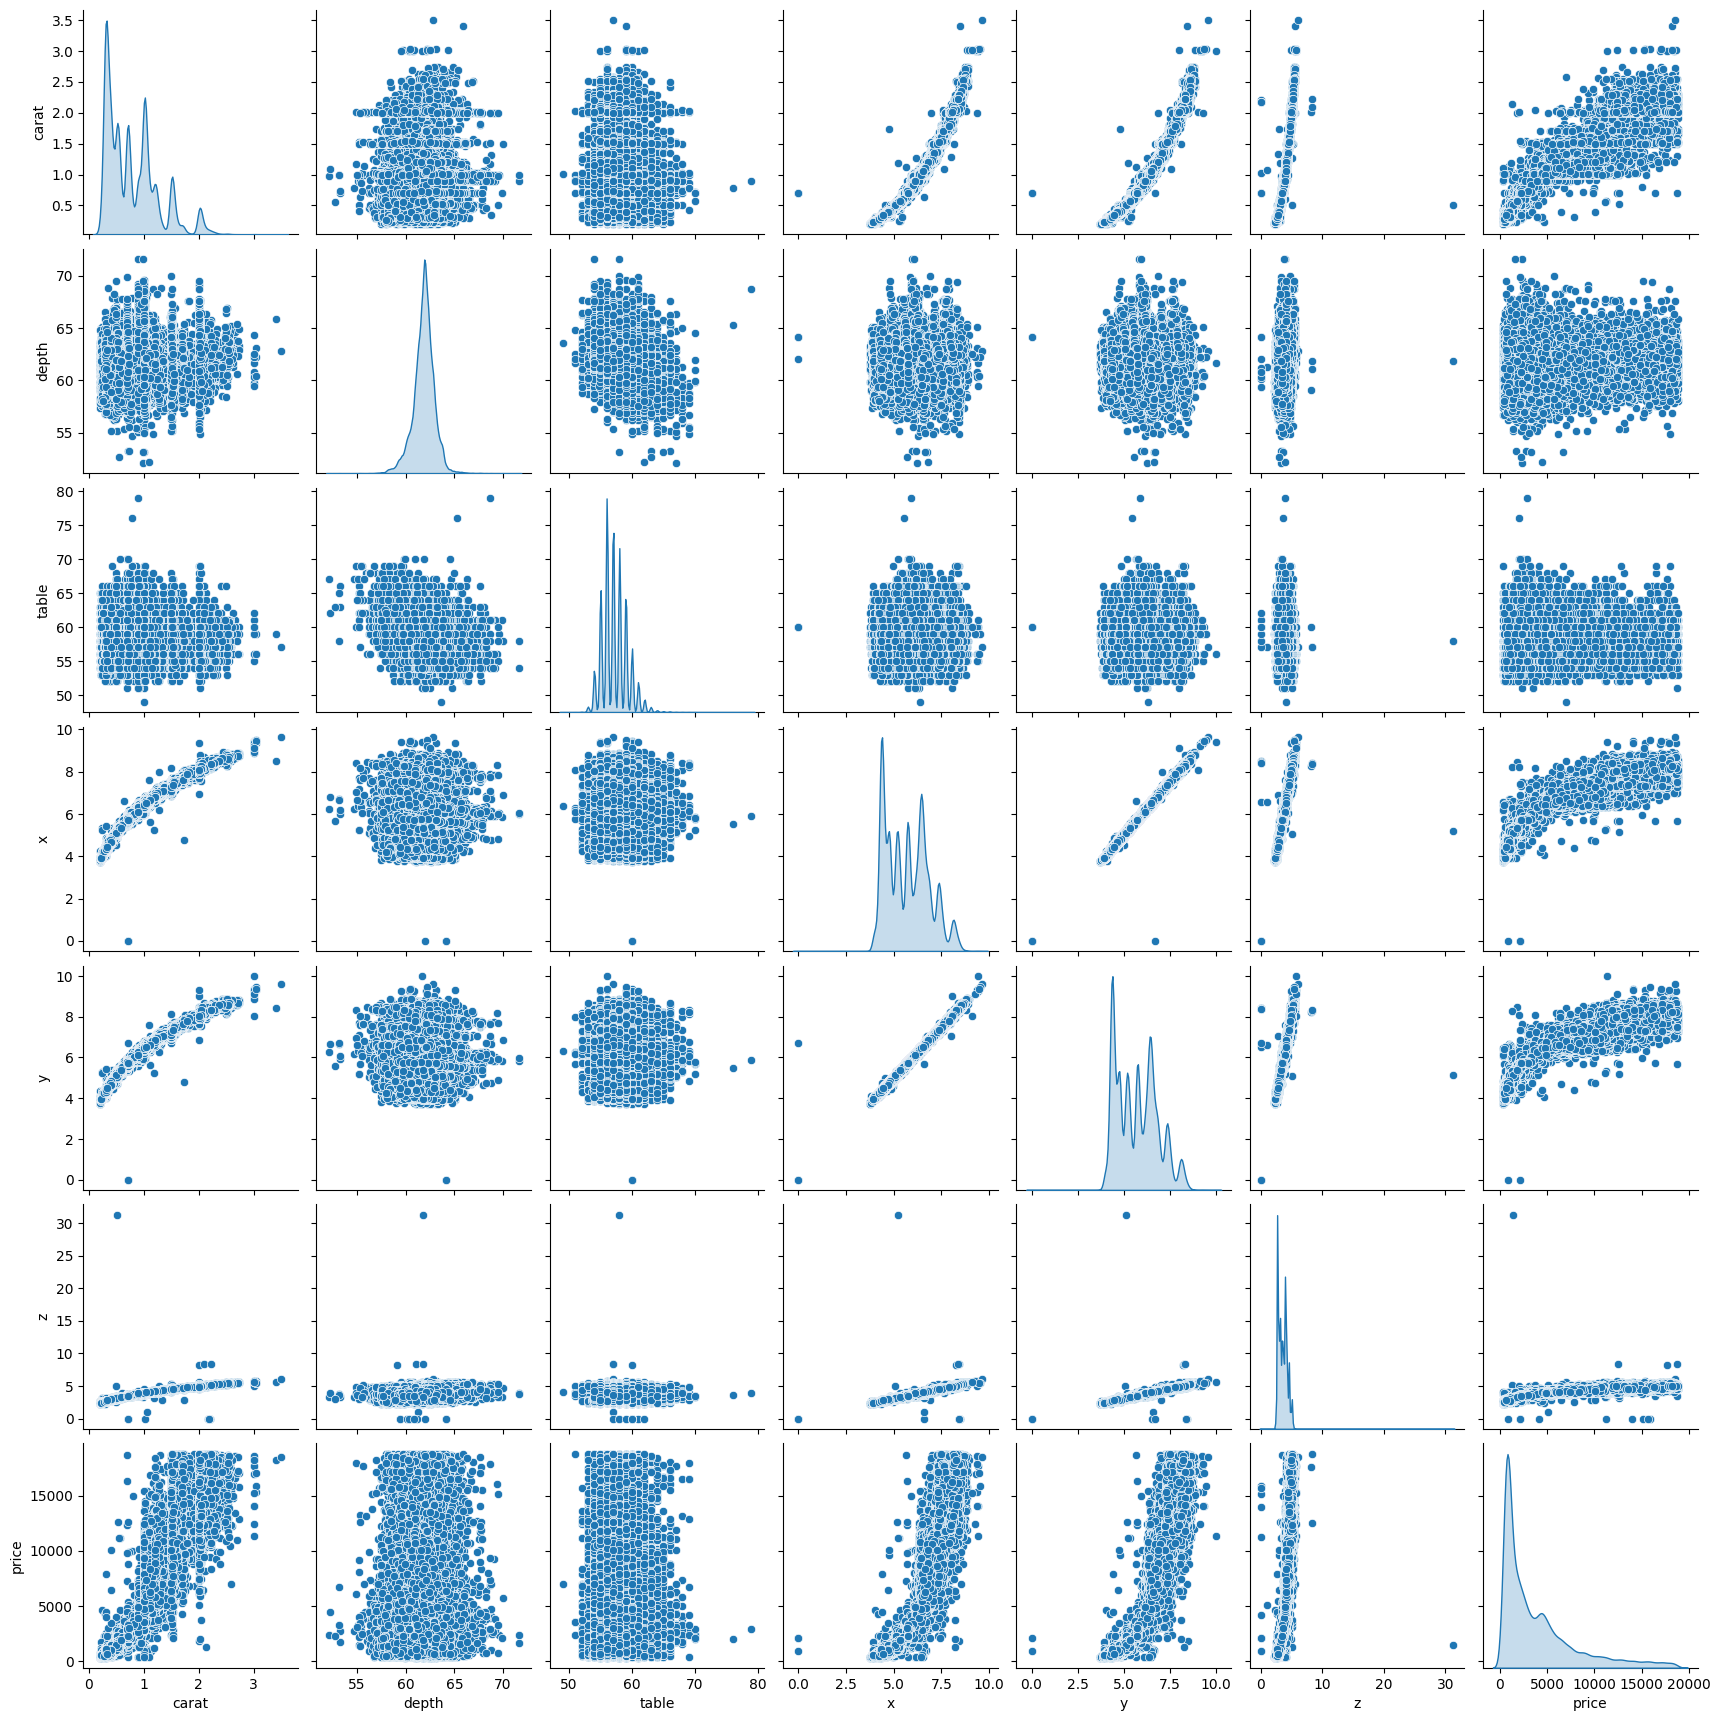

In [47]:
sns.pairplot(train_df, diag_kind='kde')

It is observed that the categorical variables 'cut', 'color' and 'clarity' are ordinal in nature

### Creating Mapper for each categorical variable   

In [50]:
categorical_features

['cut', 'color', 'clarity']

In [53]:
train_df.clarity.unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [55]:
cut_mapper = {"Fair":1, "Good":2, "Very Good":3 , "Premium":4 ,"Ideal":5}
clarity_mapper = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_mapper = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [56]:
train_df['cut'] = train_df['cut'].replace(cut_mapper)
train_df['clarity'] = train_df['clarity'].replace(clarity_mapper)
train_df['color'] = train_df['color'].replace(color_mapper)

In [57]:
train_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


In [58]:
X = train_df.drop(columns='price', axis=1)
y = train_df[['price']]

### Calculating Mutual Information Score